<a href="https://colab.research.google.com/github/Eubeatriz/Analise_Attrition_DataGirls/blob/main/AnaliseDados_DataGirls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas e dados

In [ ]:
#importando os dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/drive/MyDrive/ProjetoDataGirls/BaseDados_ProjetoDataGirls.xlsx')

# Leitura & Exploração Inicial

In [ ]:
# Quantas linhas e colunas?
df.shape

(1470, 35)

In [ ]:
# Tipos de dados e valores nulos
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
# Vamos verificar se temos dados duplicados
df.duplicated().sum()

np.int64(0)

# Limpeza & Preparação dos Dados

In [ ]:
# Remover colunas inúteis
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

# 'EmployeeCount', 'StandardHours', 'Over18' são colunas constantes → remova
# 'EmployeeNumber' pode ser descartado se não for usado como ID

# Tratamento de Outliers

In [ ]:
# Função para contar outliers (reutilizável)
def contar_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
    return len(outliers)

# Reaplicar em todas as colunas numéricas do df limpo
num_cols_limpo = df.select_dtypes(include="number")
outliers_restantes = num_cols_limpo.apply(contar_outliers)

print("Outliers restantes por coluna:")
print(outliers_restantes)


Outliers restantes por coluna:
Age                           0
DailyRate                     0
DistanceFromHome              0
Education                     0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64


In [ ]:
colunas_outliers = ['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']

# finding Boundries
percentile75 = df[colunas_outliers].quantile(0.75)
percentile25 = df[colunas_outliers].quantile(0.25)

In [ ]:
# Calculando o IQR
iqr = percentile75-percentile25
iqr

,0
MonthlyIncome,5468.0
NumCompaniesWorked,3.0
StockOptionLevel,1.0
TotalWorkingYears,9.0
TrainingTimesLastYear,1.0
YearsAtCompany,6.0
YearsInCurrentRole,5.0
YearsSinceLastPromotion,3.0
YearsWithCurrManager,5.0
PerformanceRating,0.0


In [ ]:
# Upper Boundry Lower Boundry
limite_superior = percentile75 + 1.5 * iqr
limite_inferior = percentile25 - 1.5 * iqr

In [ ]:
df[colunas_outliers] = df[colunas_outliers].clip(lower=limite_inferior, upper=limite_superior, axis=1)

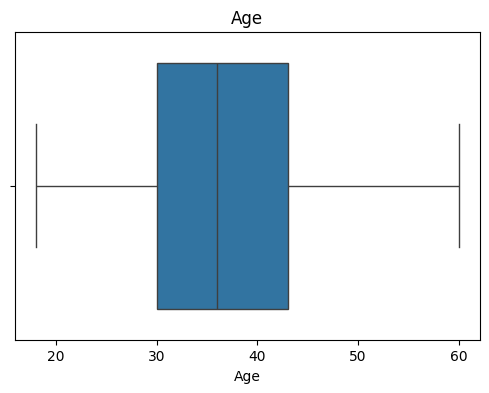

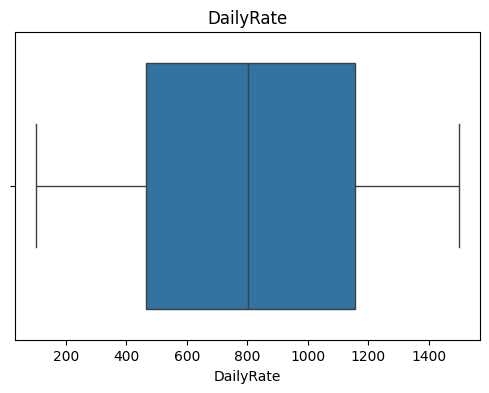

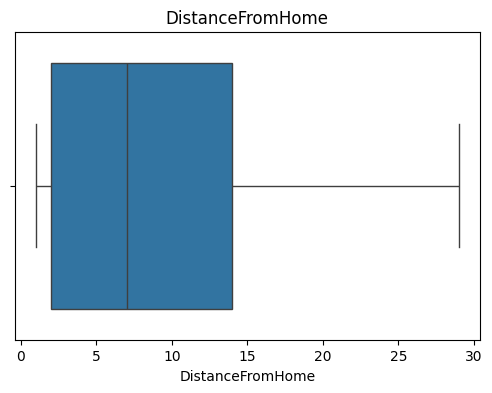

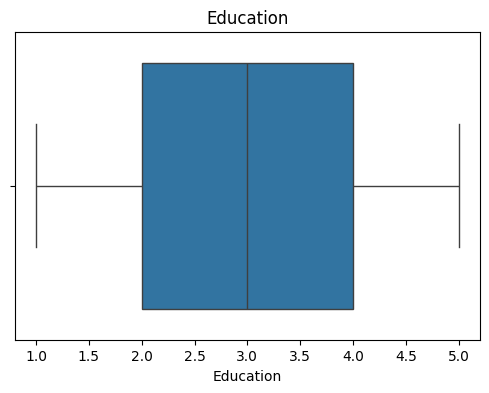

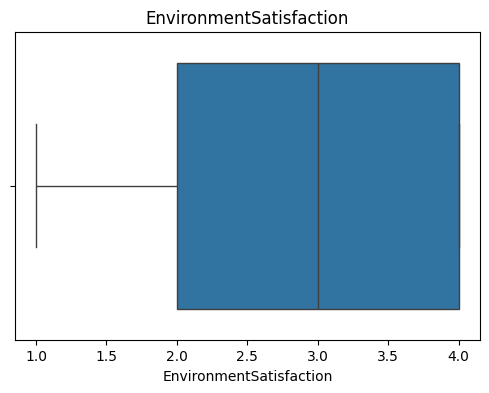

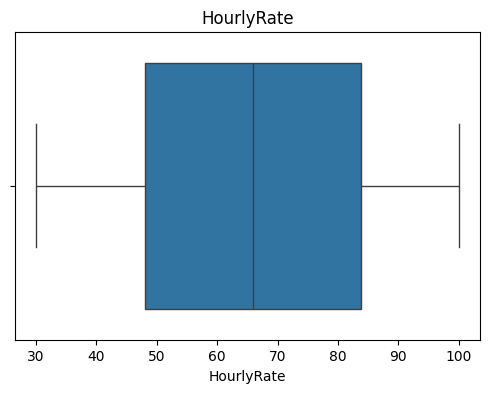

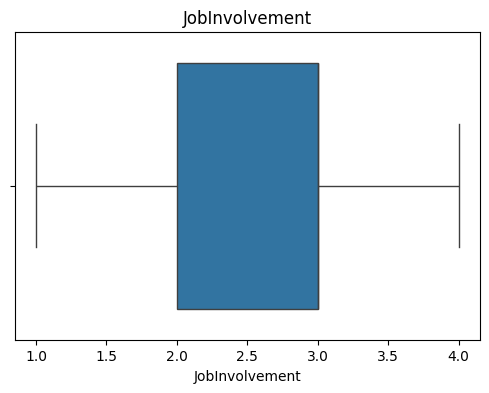

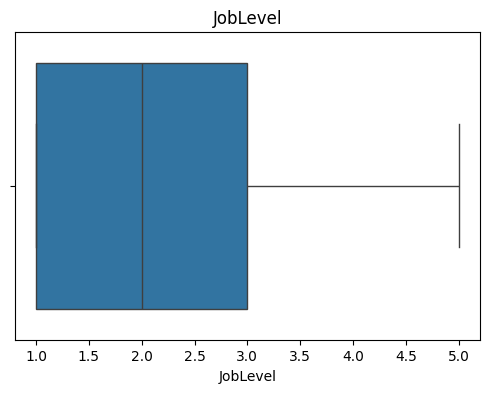

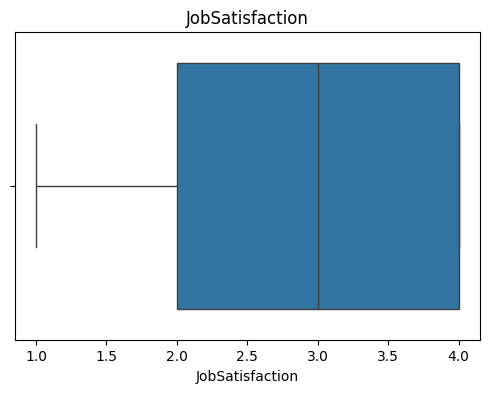

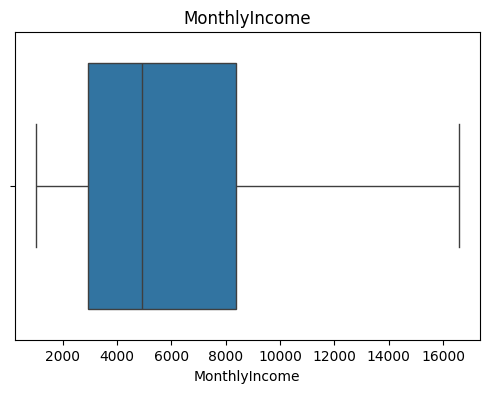

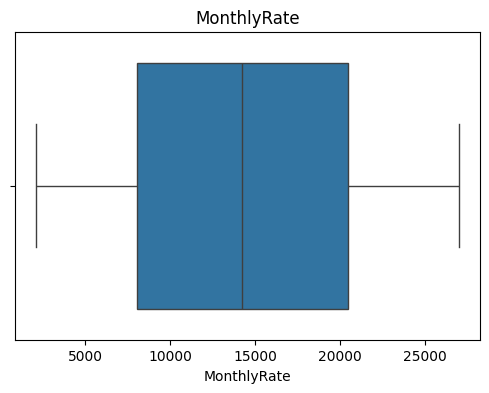

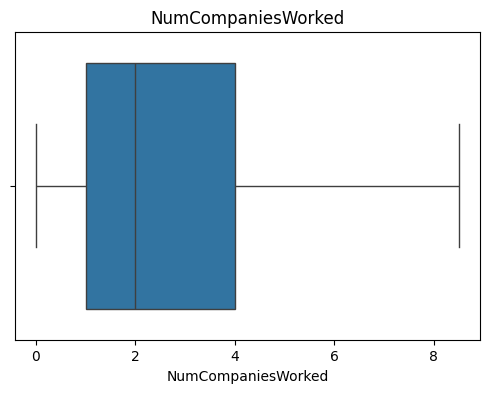

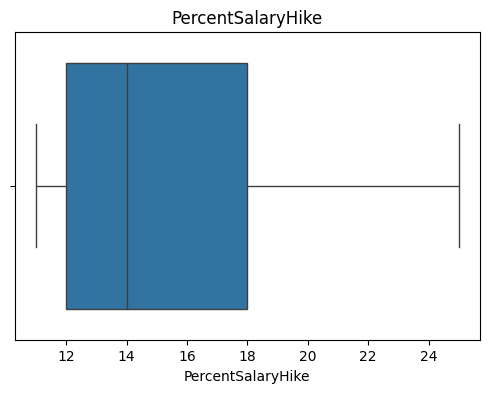

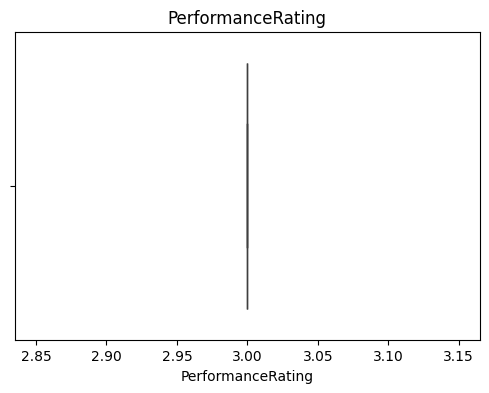

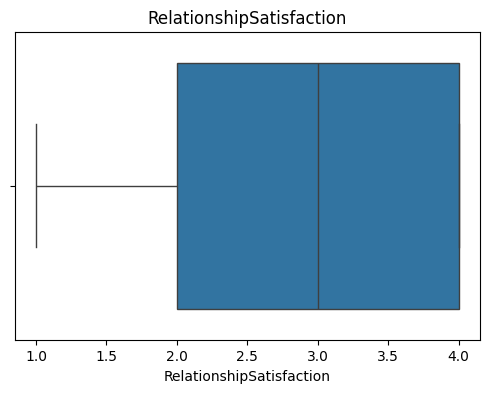

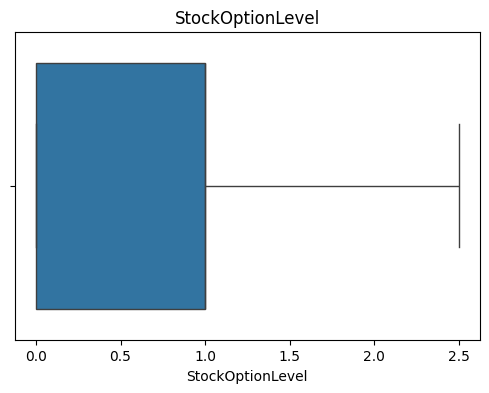

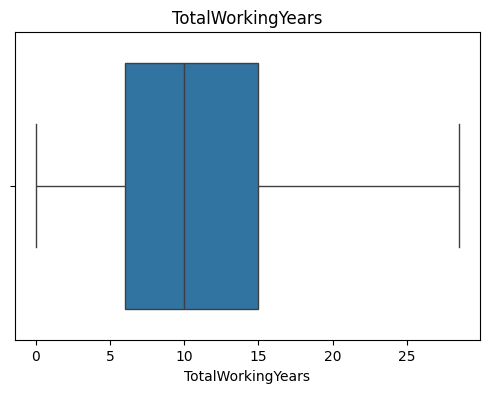

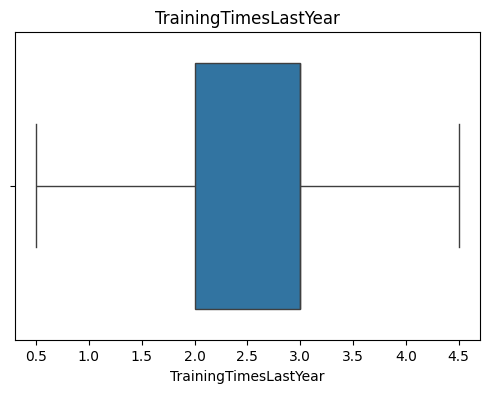

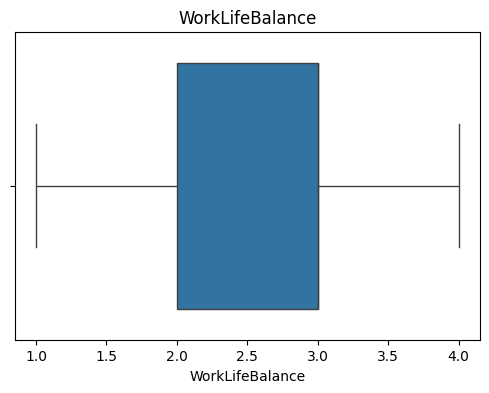

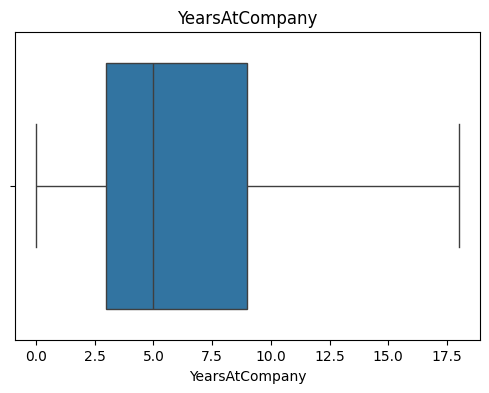

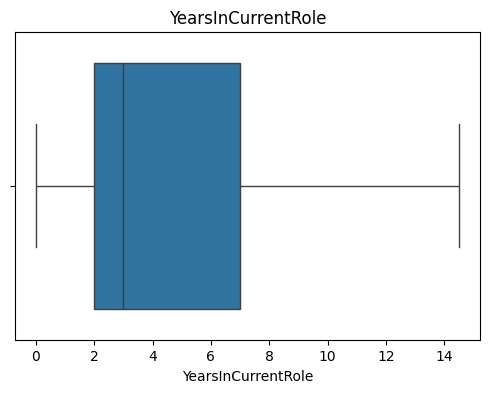

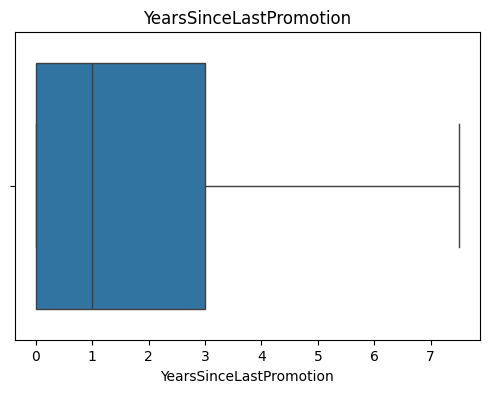

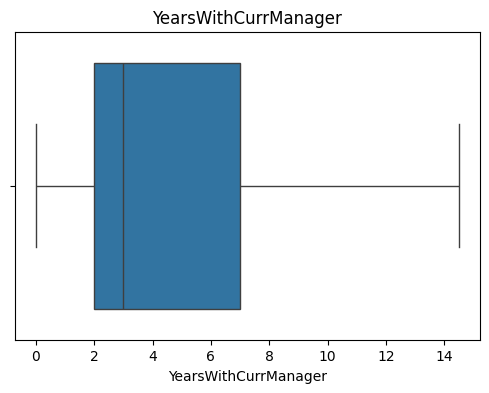

In [ ]:
#boxplot para confirmar a resolução dos outliers

for col in num_cols_limpo:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# Análise Exploratória (EDA)

## Analisando colunas categóricas

### Attrition

/tmp/ipython-input-394349727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette = 'deep')


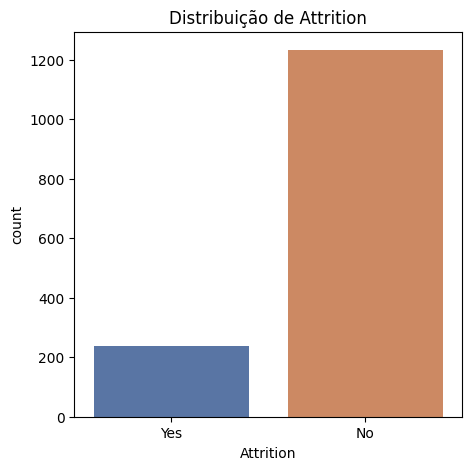

In [ ]:
# Gráfico distribuição attrition
plt.figure(figsize=(5,5))
sns.countplot(x='Attrition', data=df, palette = 'deep')
plt.title('Distribuição de Attrition')
plt.show()

**Conclusões:** Temos mais pessoas que NÃO saíram da empresa (Attrition)

### Gender

/tmp/ipython-input-2953695989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette = 'bright')


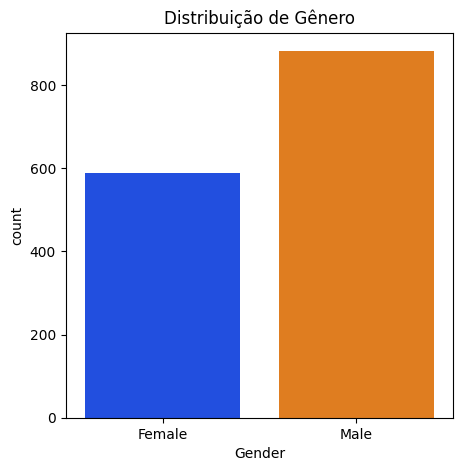

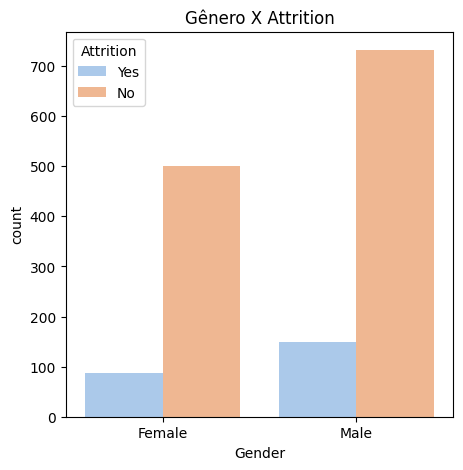

In [ ]:
# Gráfico de distribuição de gênero
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=df, palette = 'bright')
plt.title('Distribuição de Gênero')

plt.show()

# Gráfico de distribuição de gênero e attrition
plt.figure(figsize=(5,5))
sns.countplot(x = df['Gender'],hue=df['Attrition'], palette='pastel')
plt.title('Gênero X Attrition')

plt.show()

**Conclusão:**
- A maioria dos funcionários da empresa são homens
- Homens são os que mais sofrem Attrition

### EducationField

/tmp/ipython-input-3843267922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EducationField', data=df, palette = 'pastel')


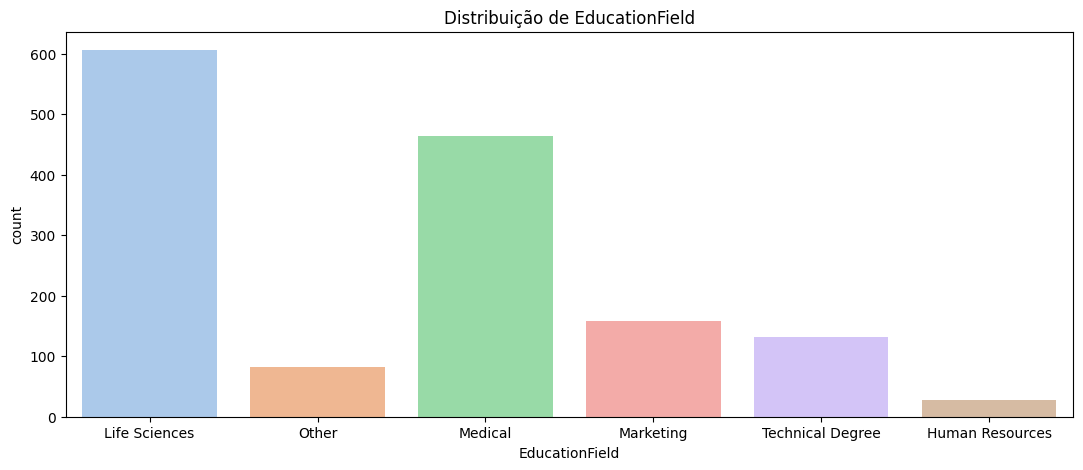

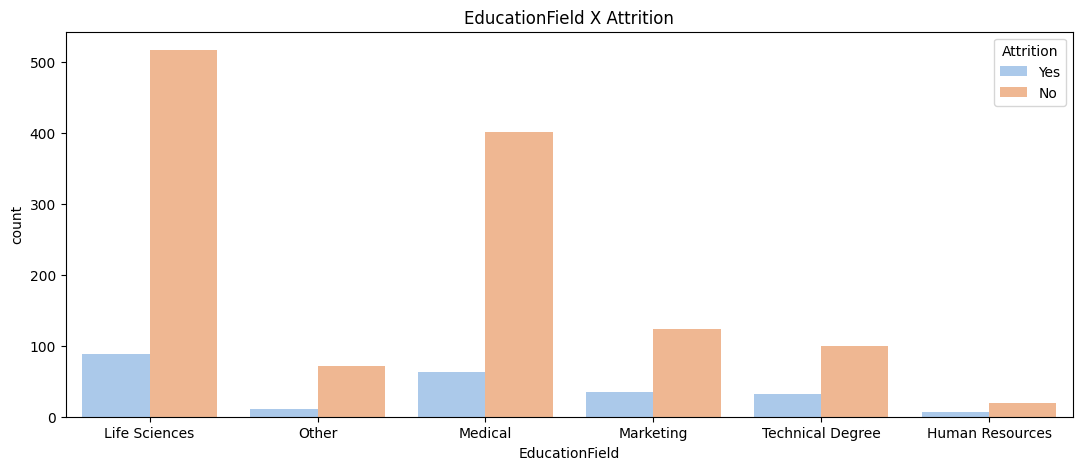

In [ ]:
# Gráfico de distribuição EducationField
plt.figure(figsize=(13,5))
sns.countplot(x='EducationField', data=df, palette = 'pastel')
plt.title('Distribuição de EducationField')

plt.show()

# Gráfico de distribuição EducationField e attrition
plt.figure(figsize=(13,5))
sns.countplot(x = df['EducationField'],hue=df['Attrition'], palette='pastel')
plt.title('EducationField X Attrition')

plt.show()

**Conclusão:**
- Maior parte dos funcionários cursaram **Life Sciences e Medical**
- As pessoas que mais sofrem attrition também são os que cursaram Life Sciences e Medical

### Marital Status

/tmp/ipython-input-1976767631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MaritalStatus', data=df, palette = 'pastel')


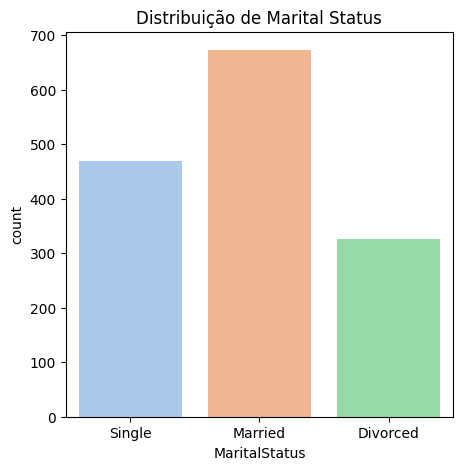

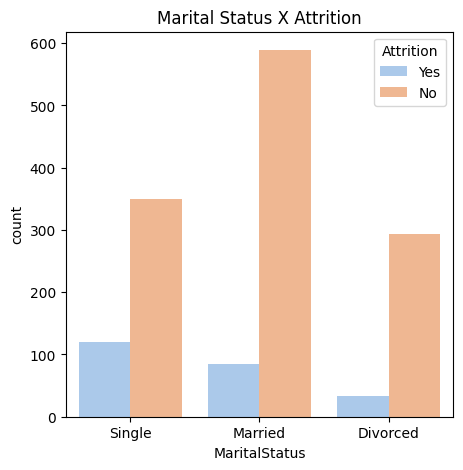

In [ ]:
# Gráfico de distribuição Marital Status
plt.figure(figsize=(5,5))
sns.countplot(x='MaritalStatus', data=df, palette = 'pastel')
plt.title('Distribuição de Marital Status')

plt.show()

# Gráfico de distribuição Marital Status e attrition
plt.figure(figsize=(5,5))
sns.countplot(x = df['MaritalStatus'],hue =df['Attrition'], palette='pastel')
plt.title('Marital Status X Attrition')

plt.show()

**Conclusão:**
- A maioria dos funcionários são **casados**
- pessoas solteiras tem o maior número de attrition

### Department

/tmp/ipython-input-1830800395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df, palette = 'pastel')


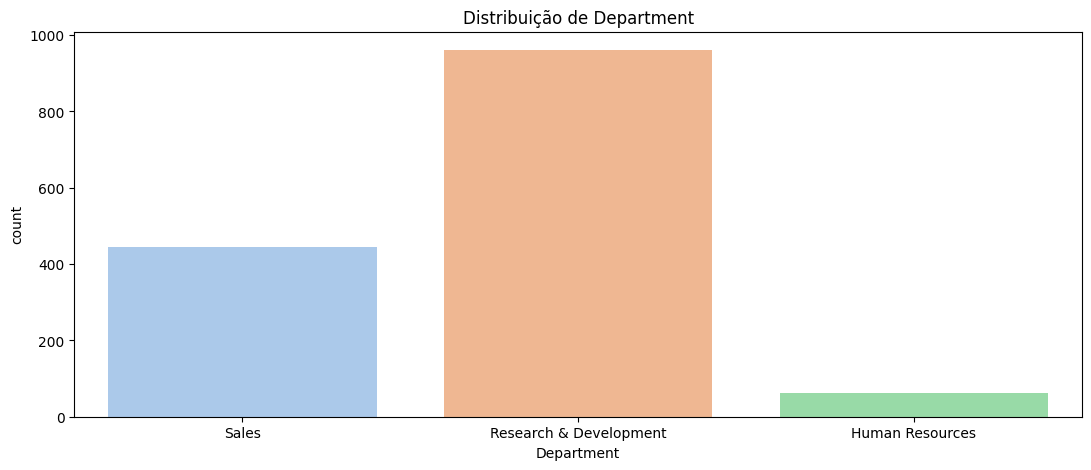

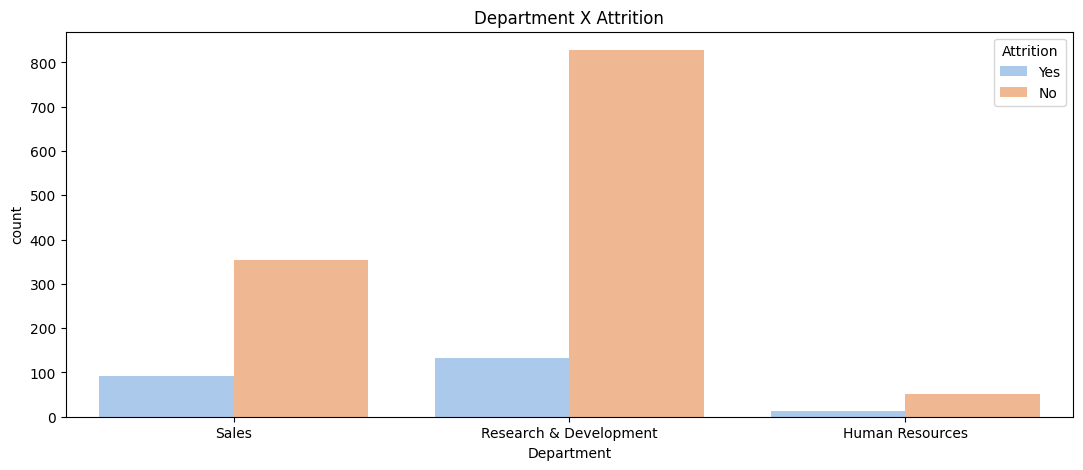

In [ ]:
# Gráfico de distribuição de Department
plt.figure(figsize=(13,5))
sns.countplot(x='Department', data=df, palette = 'pastel')
plt.title('Distribuição de Department')

plt.show()

# Gráfico de distribuição Department e Attrition
plt.figure(figsize=(13,5))
sns.countplot(x = df['Department'],hue=df['Attrition'], palette='pastel')
plt.title('Department X Attrition')

plt.show()

**Conclusão:**
- A maioria dos funcionários estão no departamento **Research & Development**
- **Research & Development** sendo o departamento com mais attrition

### Job Role

/tmp/ipython-input-789518997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobRole', data=df, palette = 'pastel')


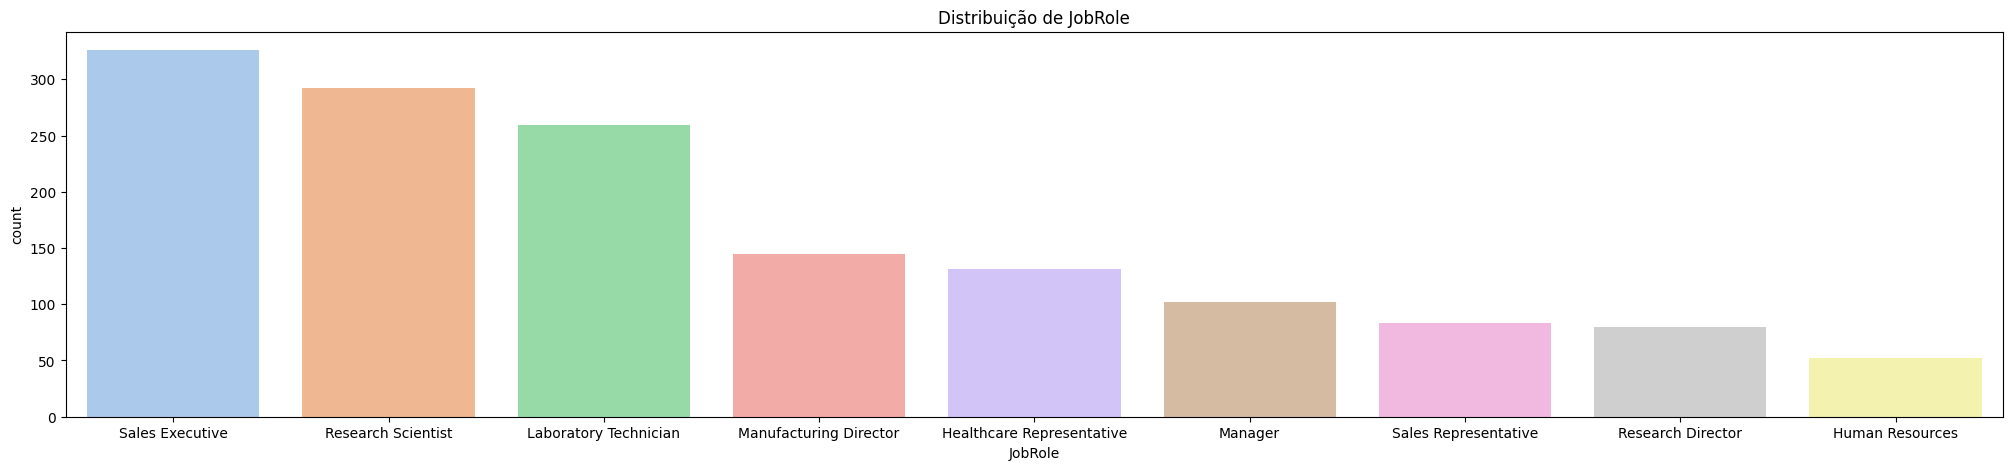

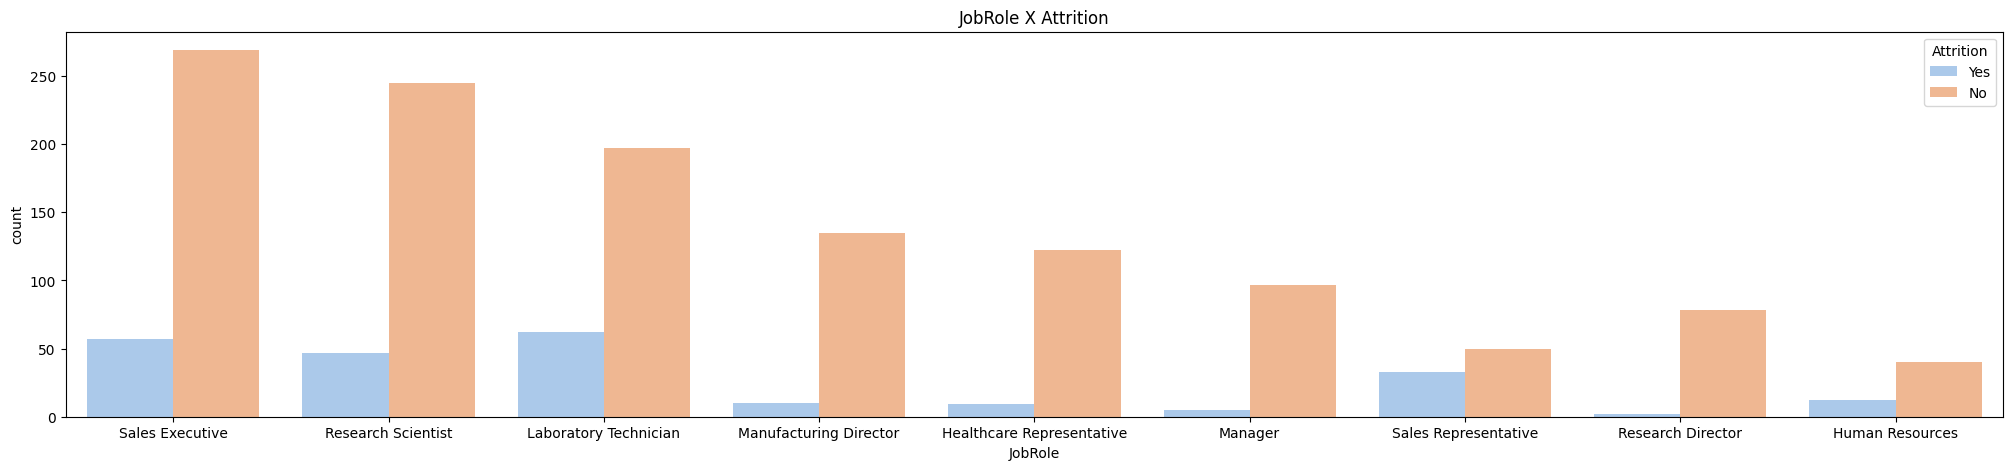

In [ ]:
# Gráfico de distribuição JobRole
plt.figure(figsize=(25,5))
sns.countplot(x='JobRole', data=df, palette = 'pastel')
plt.title('Distribuição de JobRole')

plt.show()

#Gráfico de distribuição JobRole e Attrition
plt.figure(figsize=(25,5))
sns.countplot(x = df['JobRole'],hue=df['Attrition'], palette='pastel')
plt.title('JobRole X Attrition')

plt.show()

**Conclusão:**
- **Sales Executive**, **Research Scientist** e **Laboratory Technician** sendo os cargos onde têm mais funcionários

### OverTime

/tmp/ipython-input-2305353539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OverTime', data=df, palette = 'pastel')


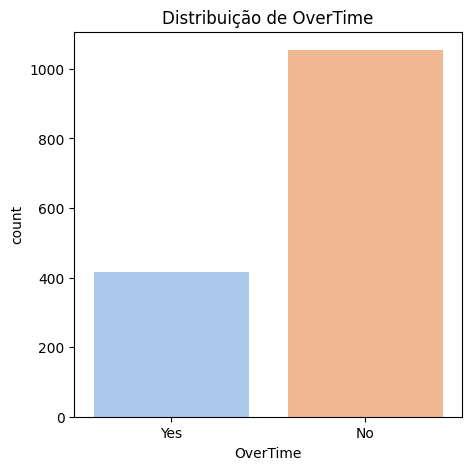

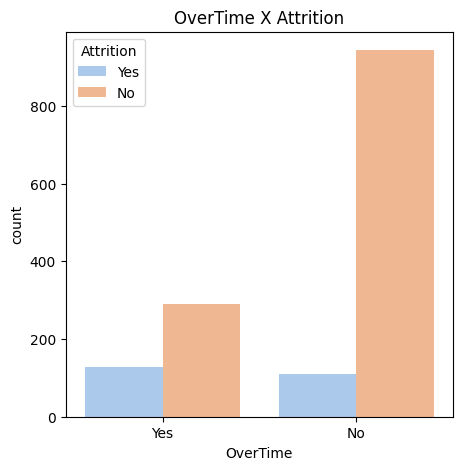

In [ ]:
# Gráfico de distribuição OverTime
plt.figure(figsize=(5,5))
sns.countplot(x='OverTime', data=df, palette = 'pastel')
plt.title('Distribuição de OverTime')

plt.show()

#Gráfico de distribuição OverTime com Attrition
plt.figure(figsize=(5,5))
sns.countplot(x = df['OverTime'],hue=df['Attrition'], palette='pastel')
plt.title('OverTime X Attrition')

plt.show()

## Analisando as colunas numéricas

### Funcionários no geral

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


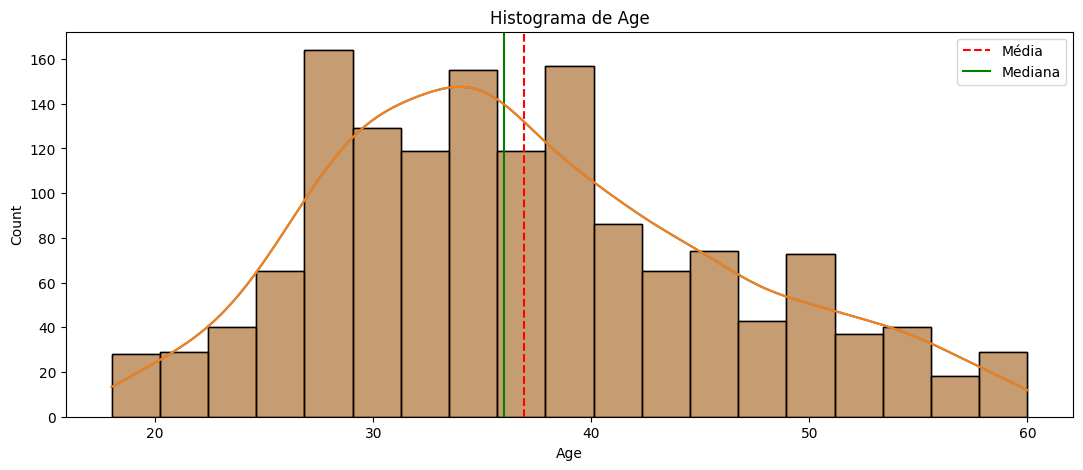

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


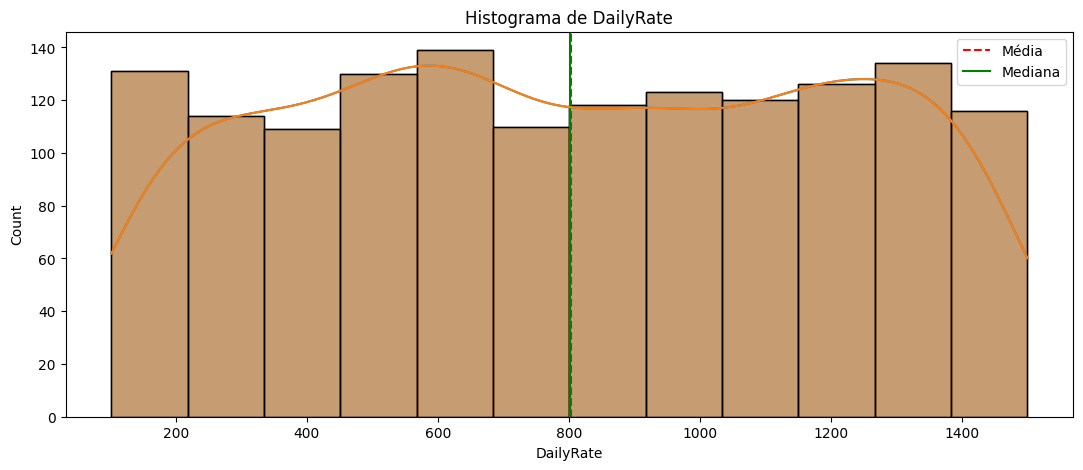

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


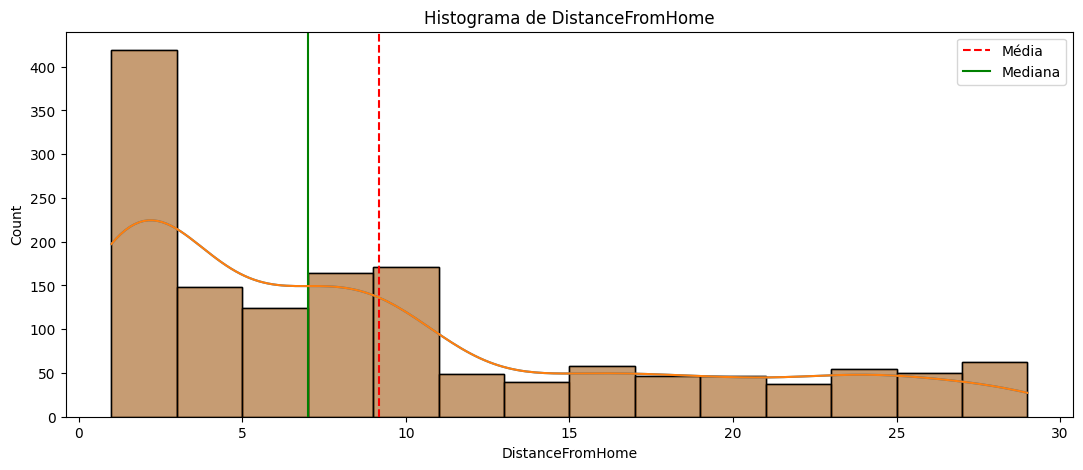

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


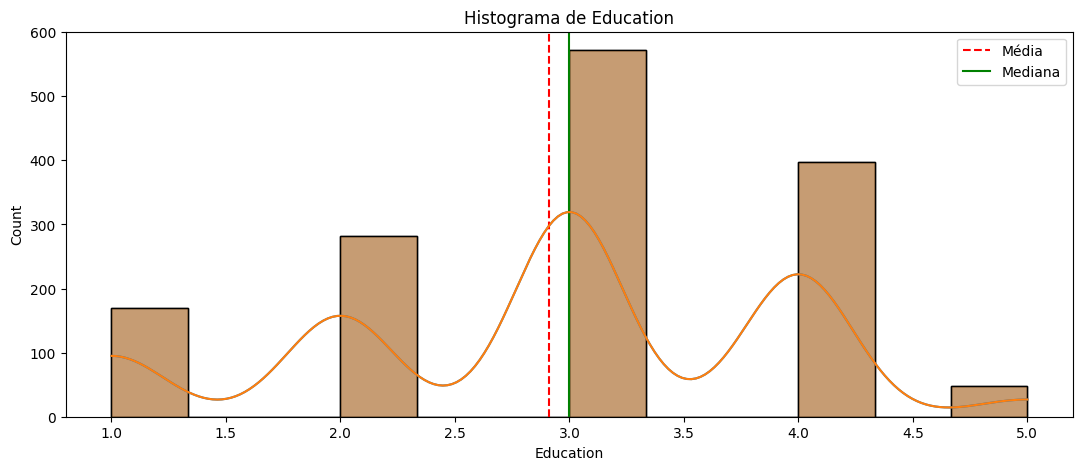

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


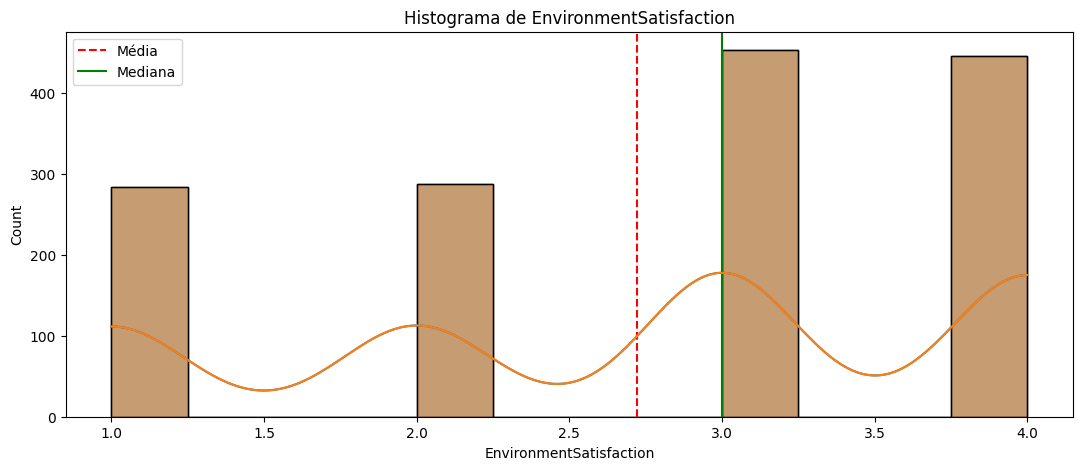

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


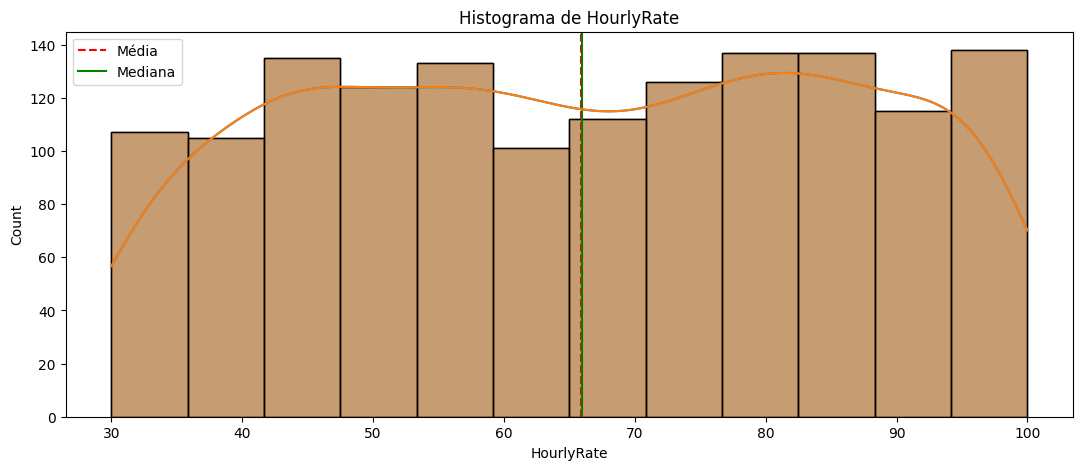

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


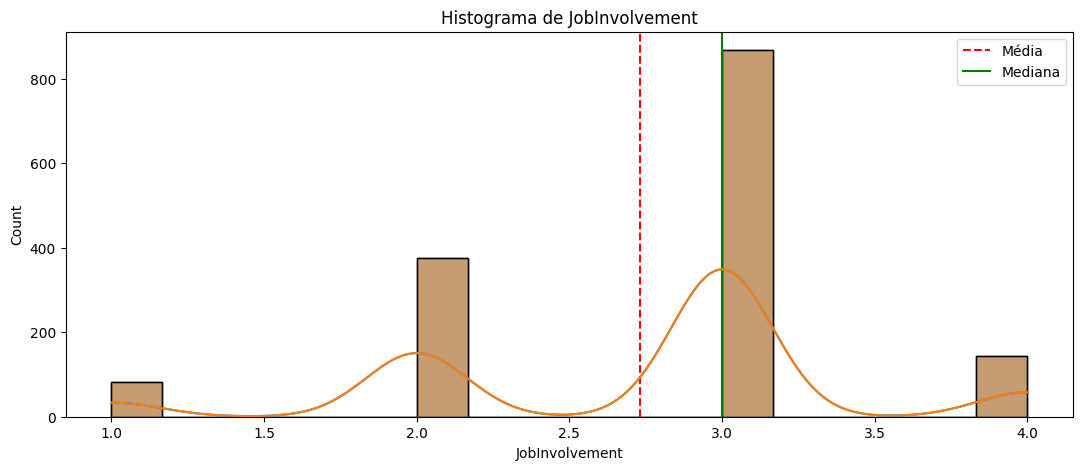

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


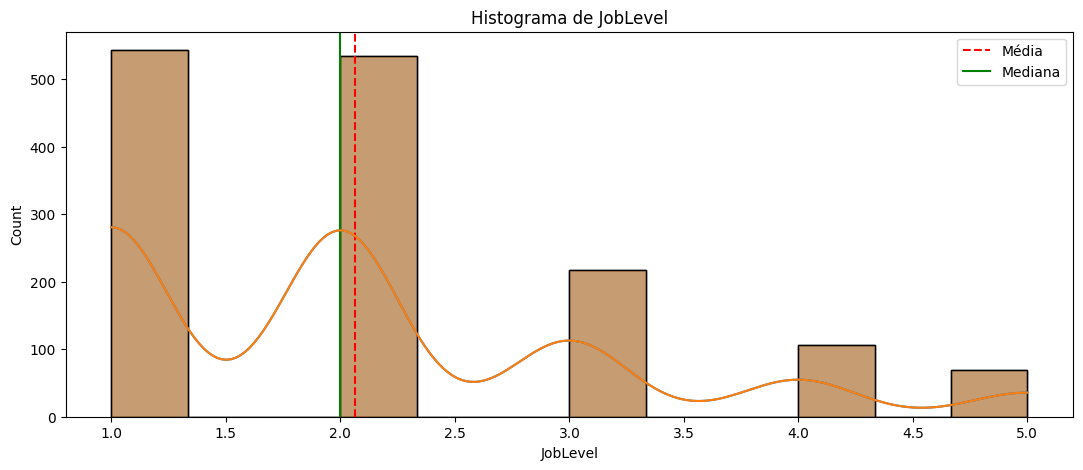

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


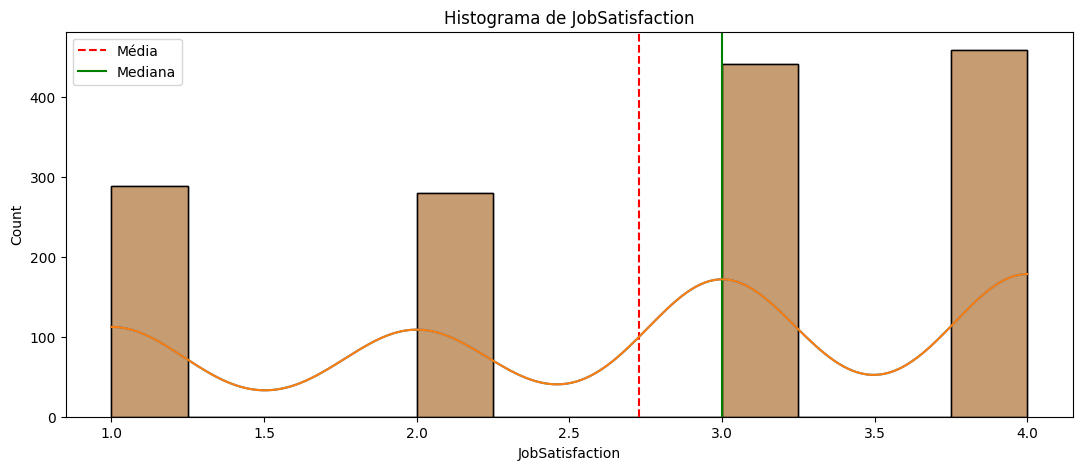

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


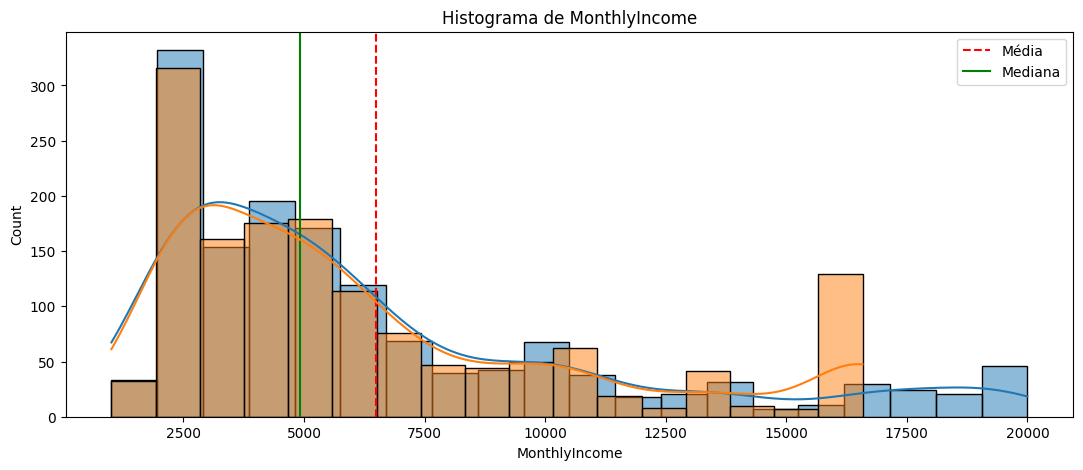

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


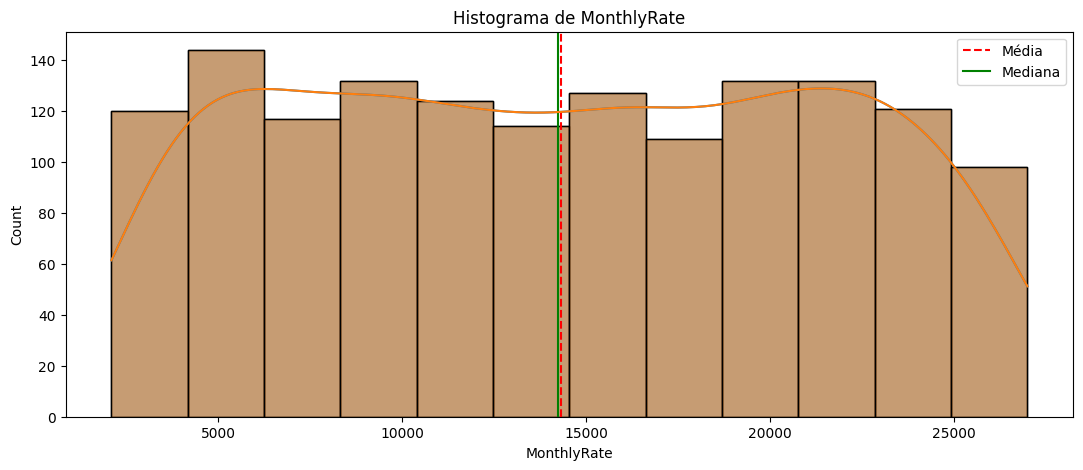

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


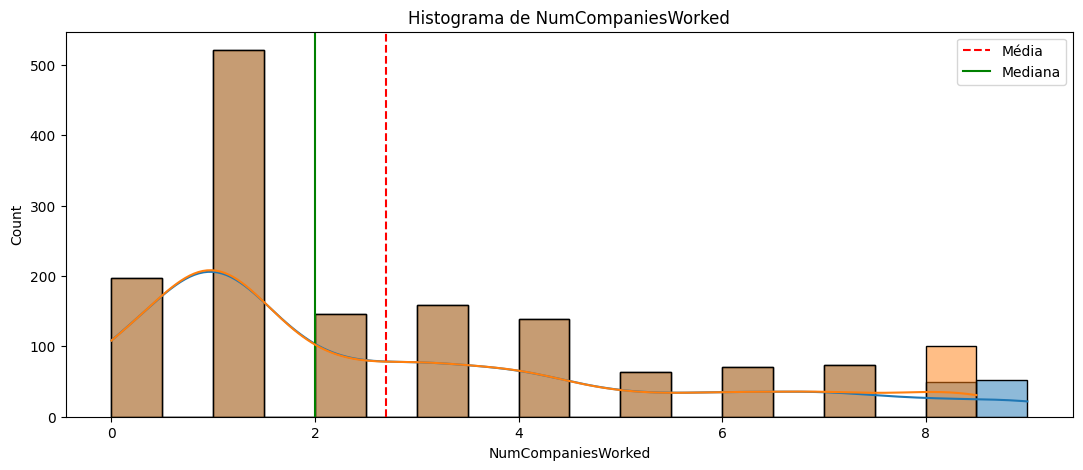

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


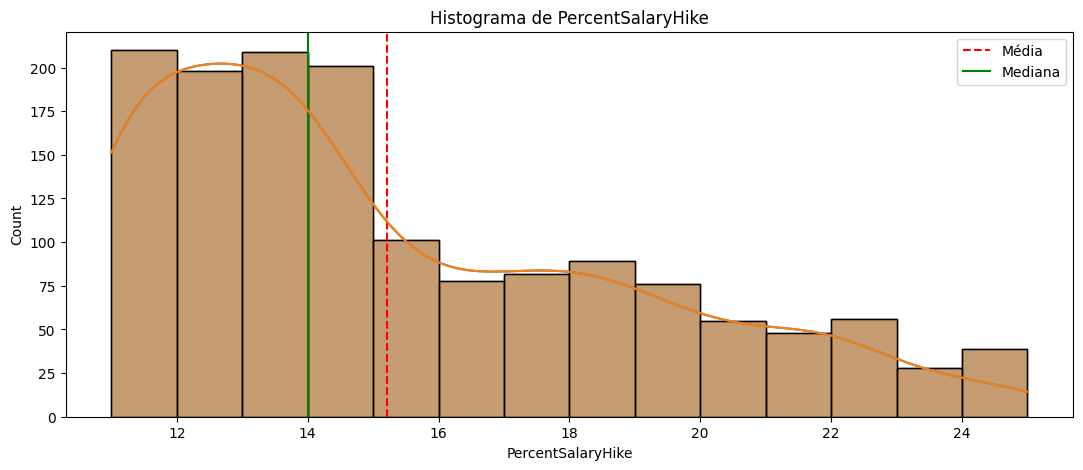

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


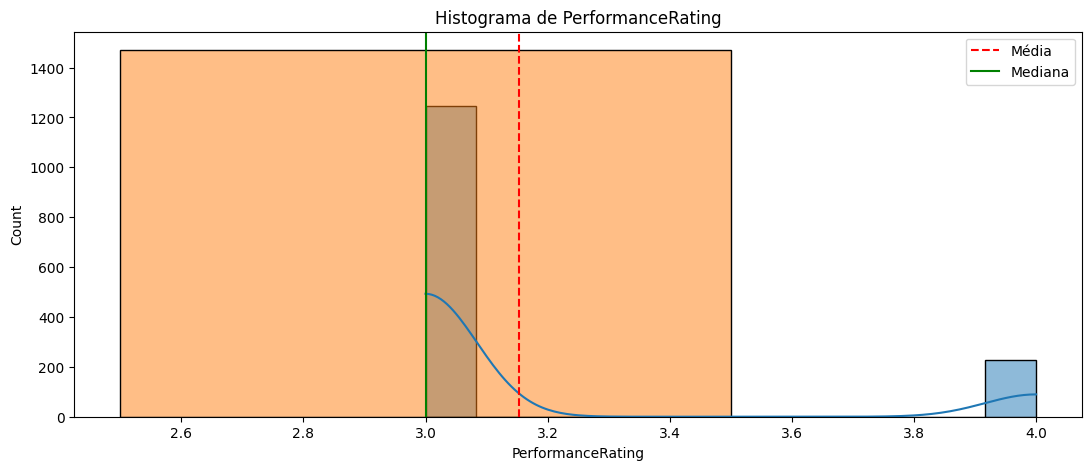

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


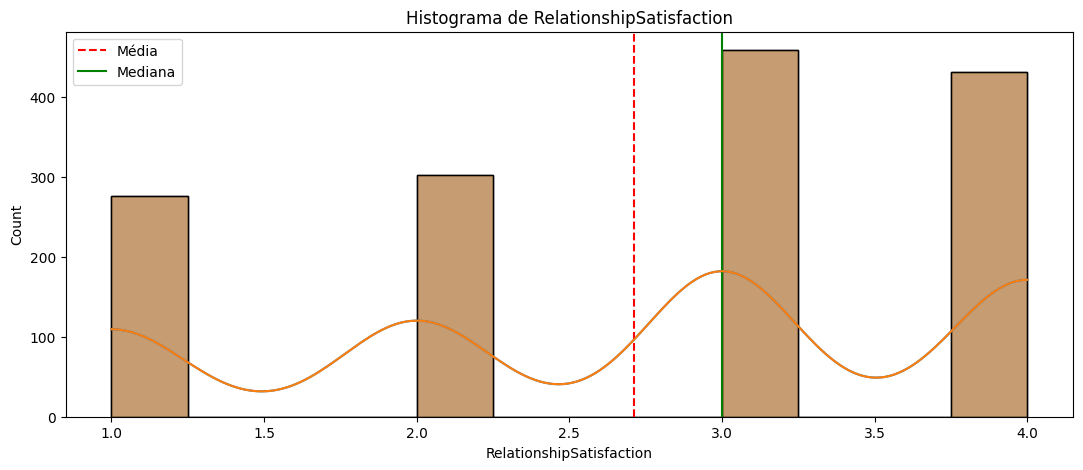

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


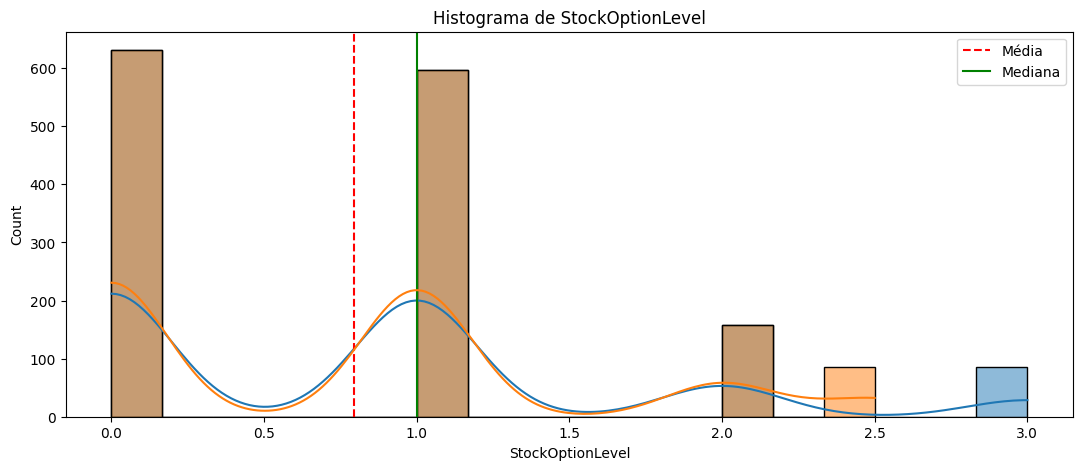

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


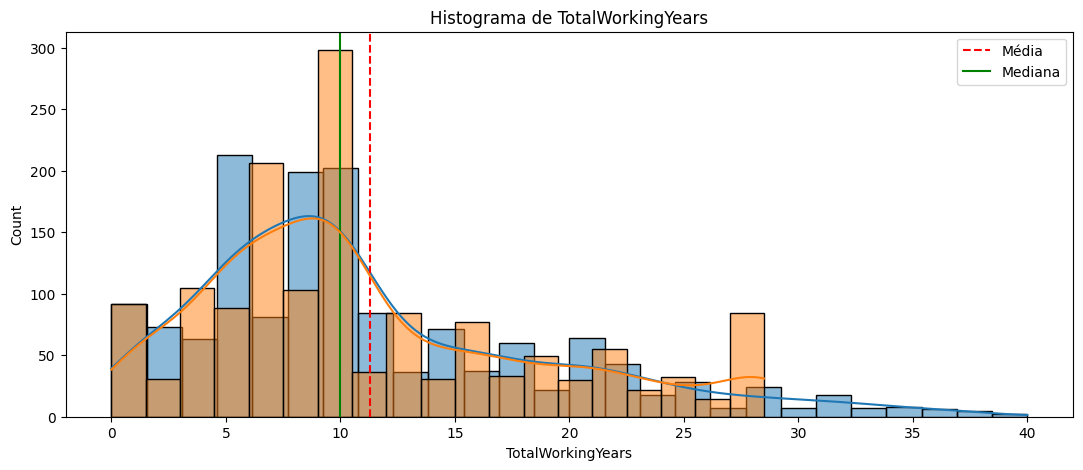

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


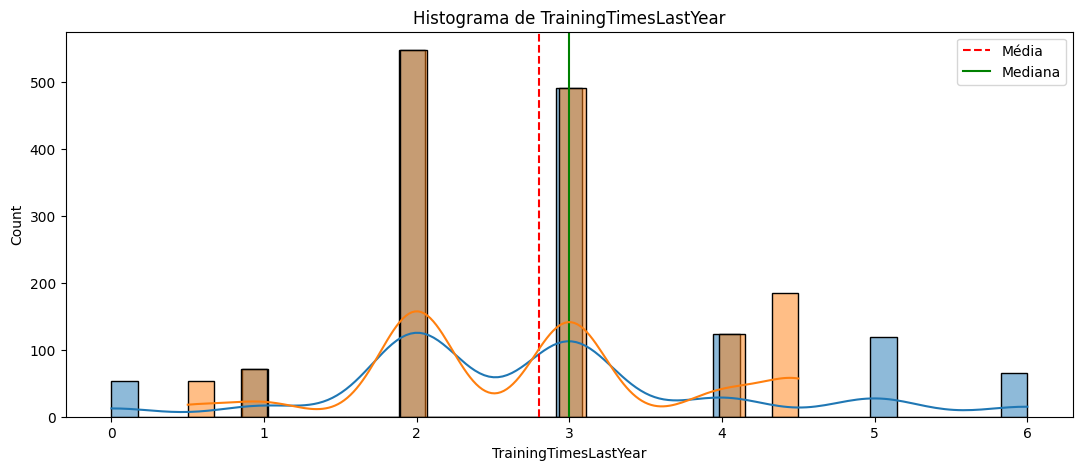

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


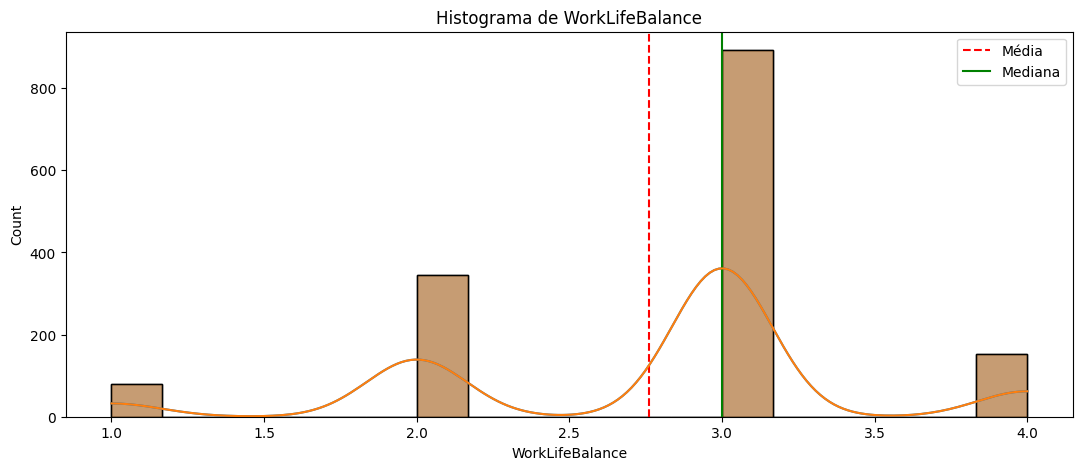

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


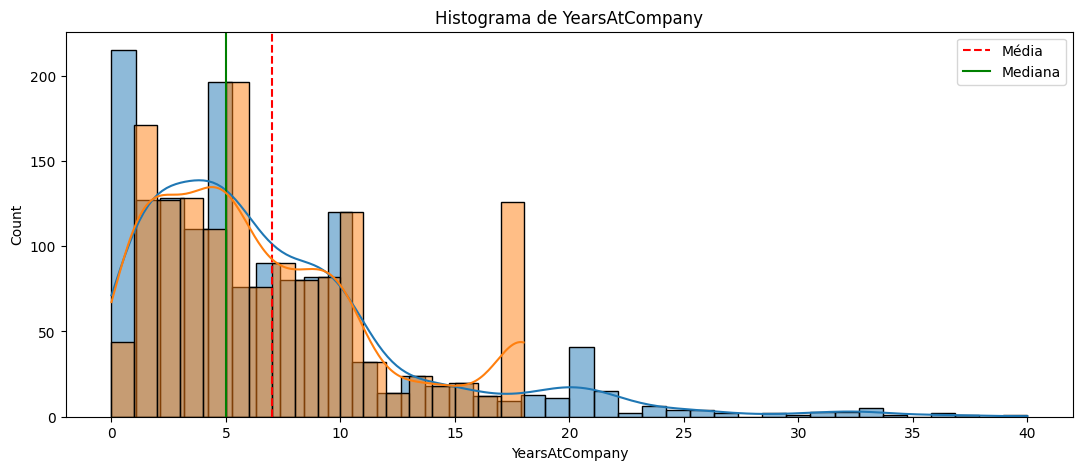

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


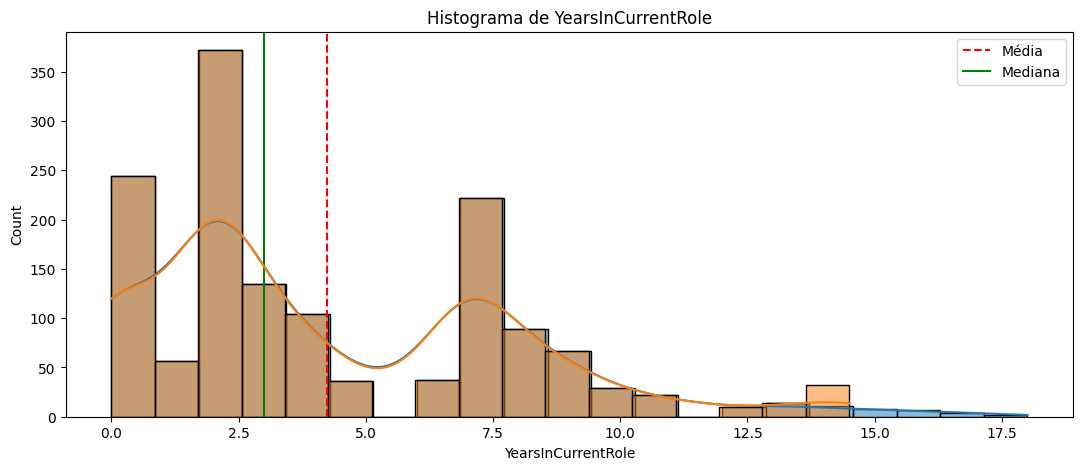

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


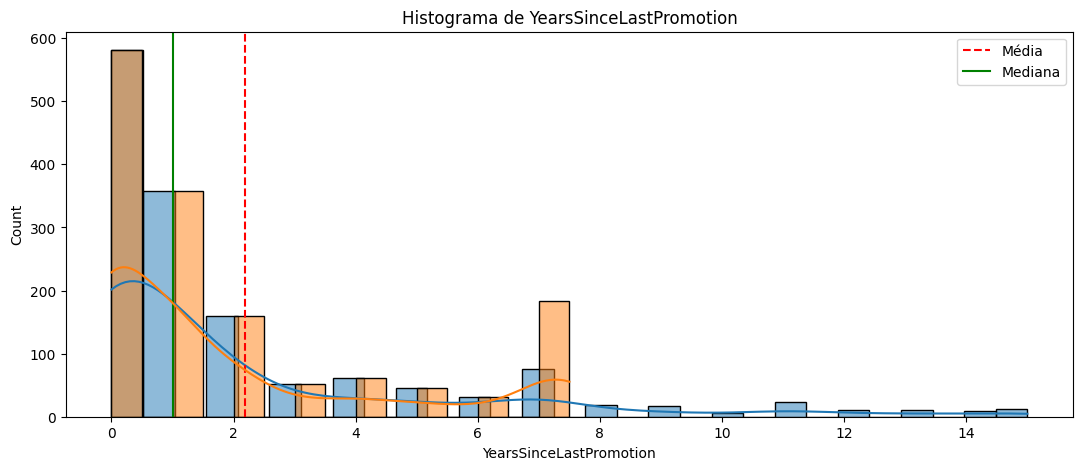

/tmp/ipython-input-199453786.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')


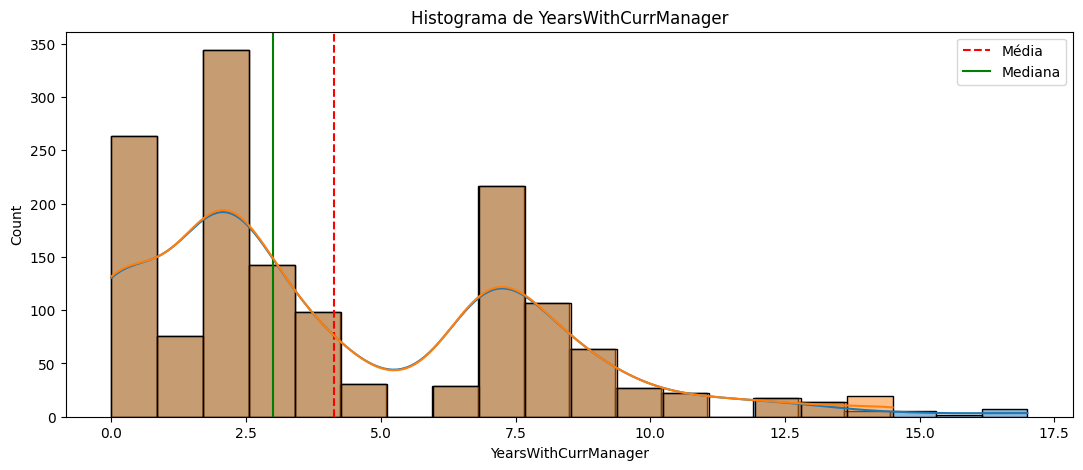

In [ ]:
# Histplot das colunas numericas
for i in num_cols_limpo.columns:
  plt.figure(figsize=(13,5))
  sns.histplot(num_cols_limpo[i], kde=True, palette= 'deep')
  plt.axvline(num_cols_limpo[i].mean(), color='red', linestyle='--', label='Média')
  plt.axvline(num_cols_limpo[i].median(), color='green', label='Mediana')
  sns.histplot(df[i], kde=True)
  plt.title(f'Histograma de {i}')
  plt.legend()
  plt.show()

**Conclusões:**
- *Age:*  idade média dos funcionários **~37 anos**
- *EnviromentSatisfation:*  média de **~2,7 (entre Medium e High)** / sendo que os valores que aparecem em maior quantidade são **3 e 4 (High e Very High)**
- *Education:*  média **~2,9 (próximo de Bachalor)** / onde o valor que aparece com maior frequência é o **3 (Bachalor)**
- *Job Involvement: * média **~2,7 (aproximadamente High**) /  onde o valor mais frequente é **3 (High)**
- *JobLevel:*  média ~2,1 / os que parecem com maior frequência são 1 e 2
- *JobSatisfation:*  média **~2,7 (aproximadamente High)** / Os que aparecem com maior frequência são **3 e 4 (High e Very High)**
- *RelationshipSatisfation:*  média **~2,7 (approximadamente High)** / maior frequência **3 e 4 (High e Very High)**
- WorkLifeBalance: média **2,7 (aproximadamente Better)** / maior frequência: **3 (Better)**

### Funcionários com Attriton "Yes"

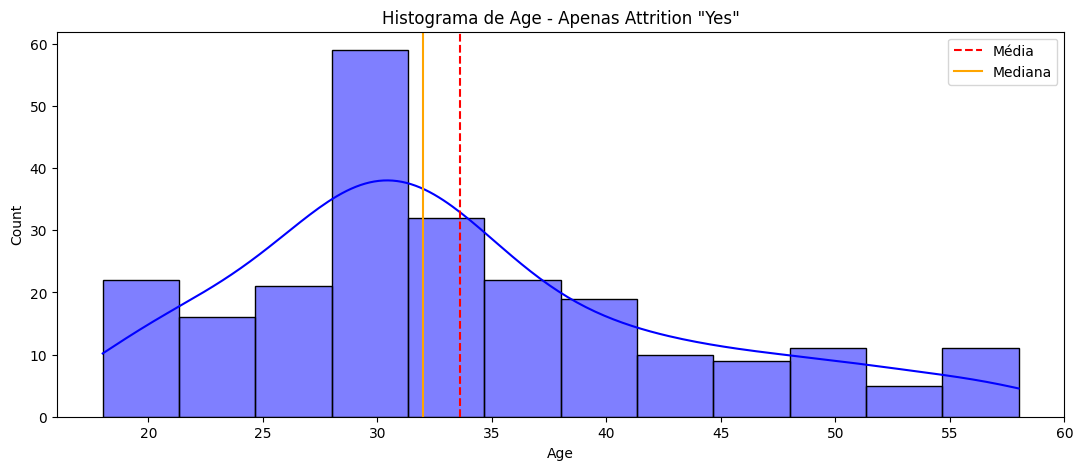

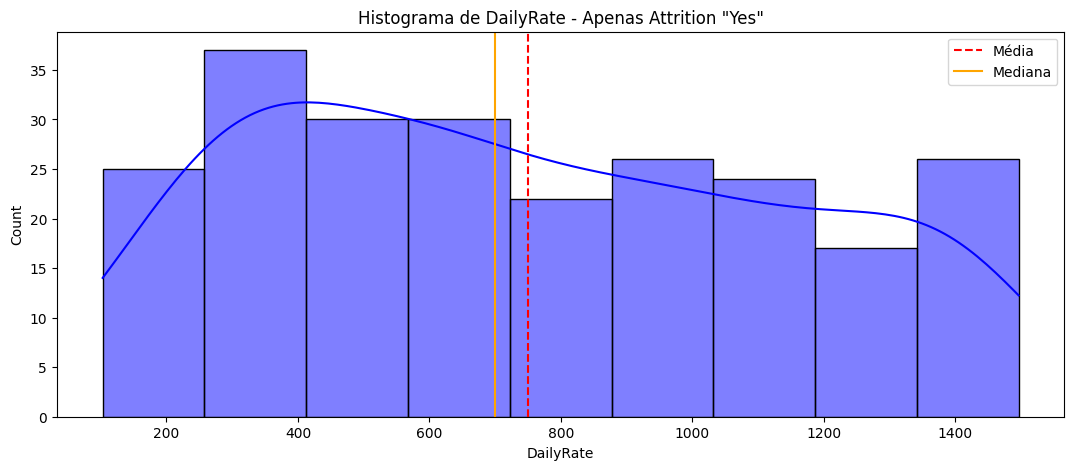

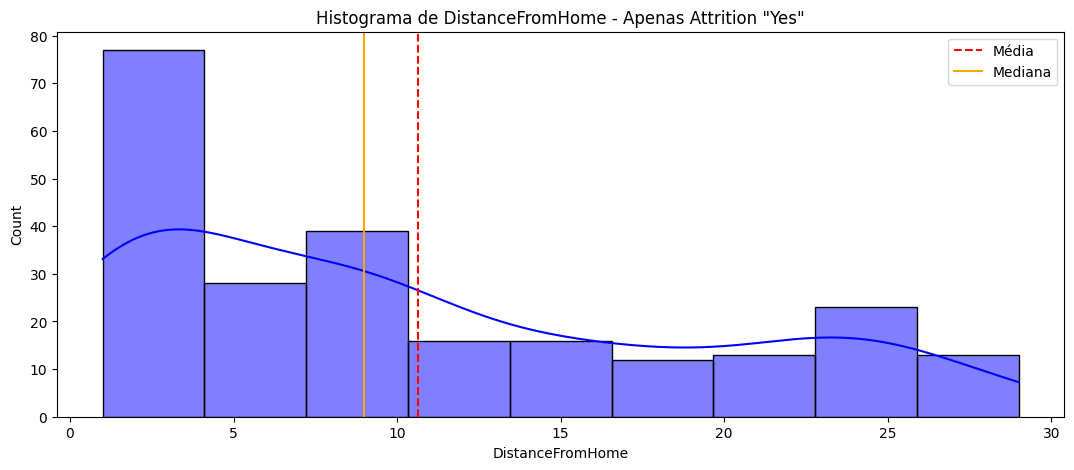

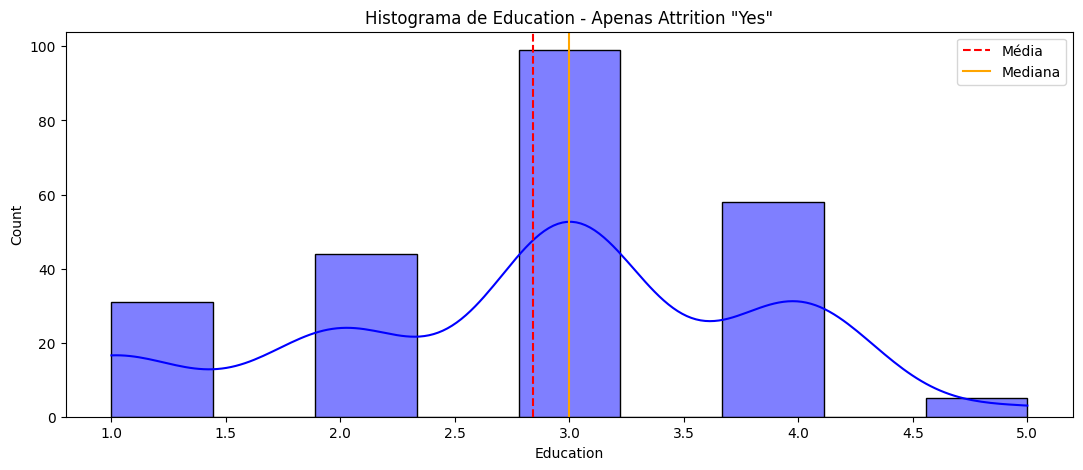

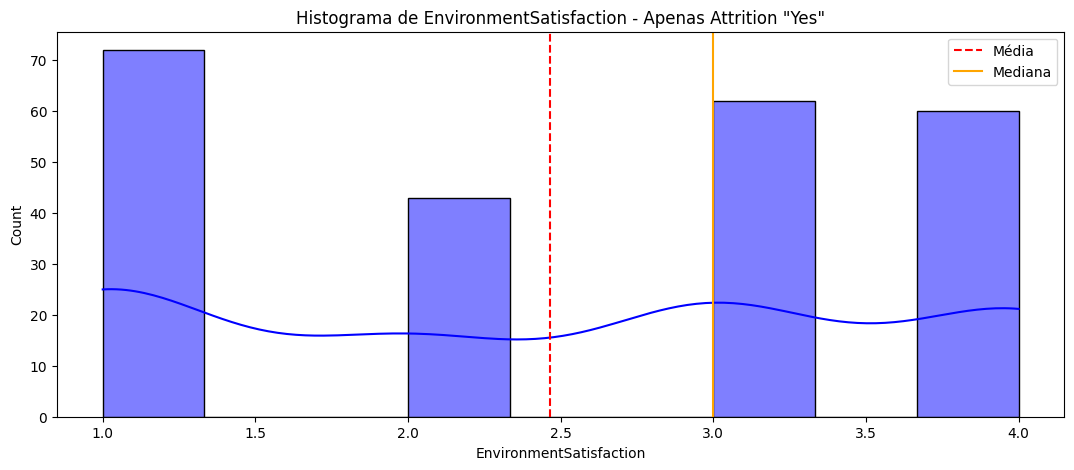

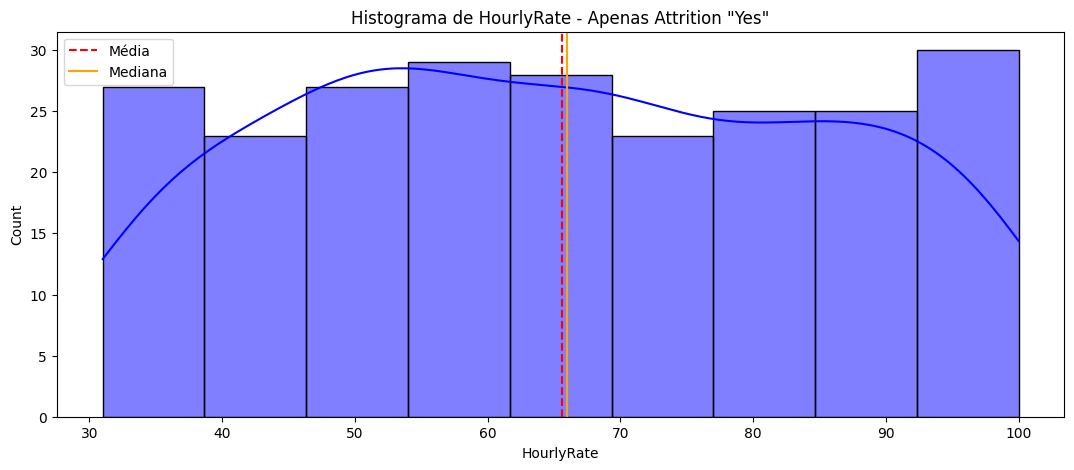

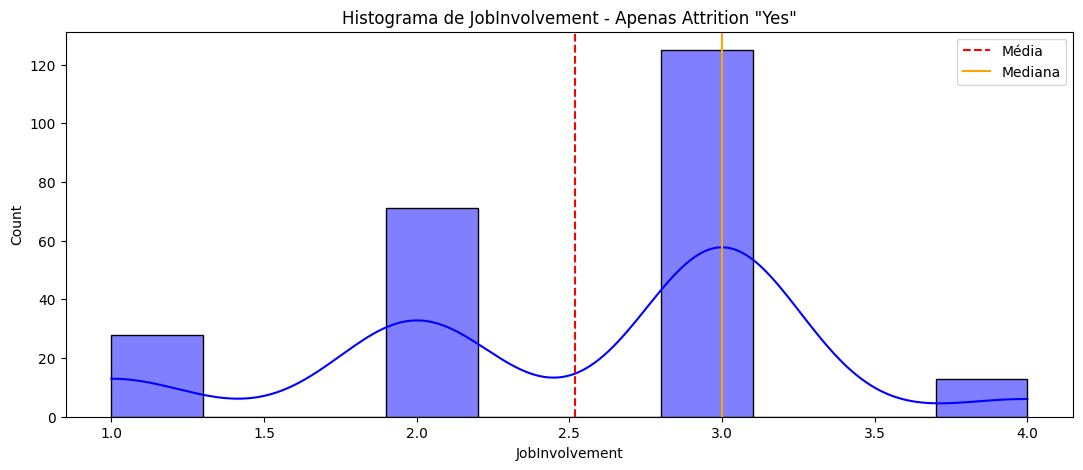

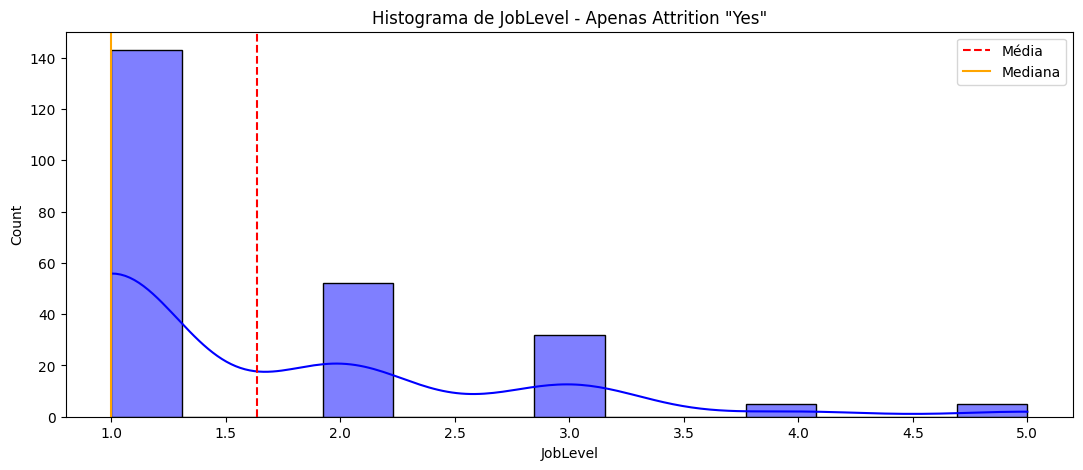

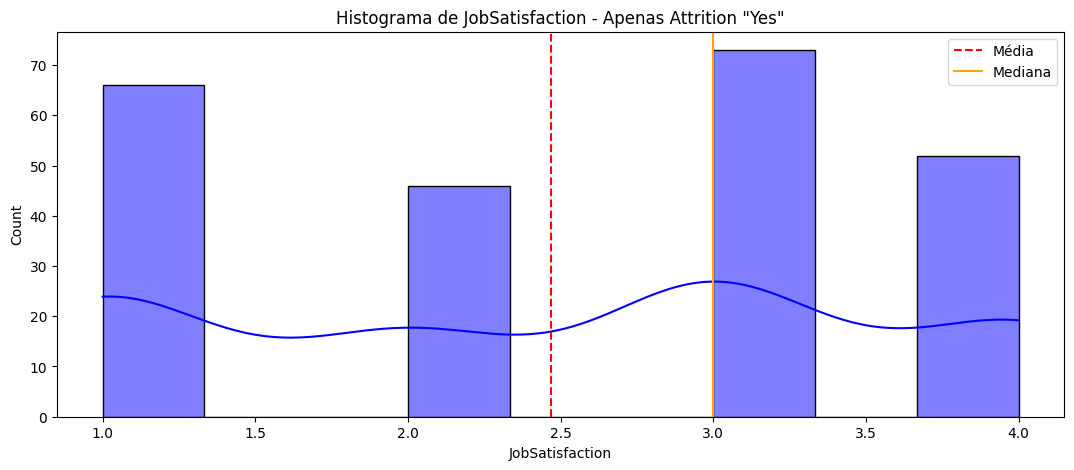

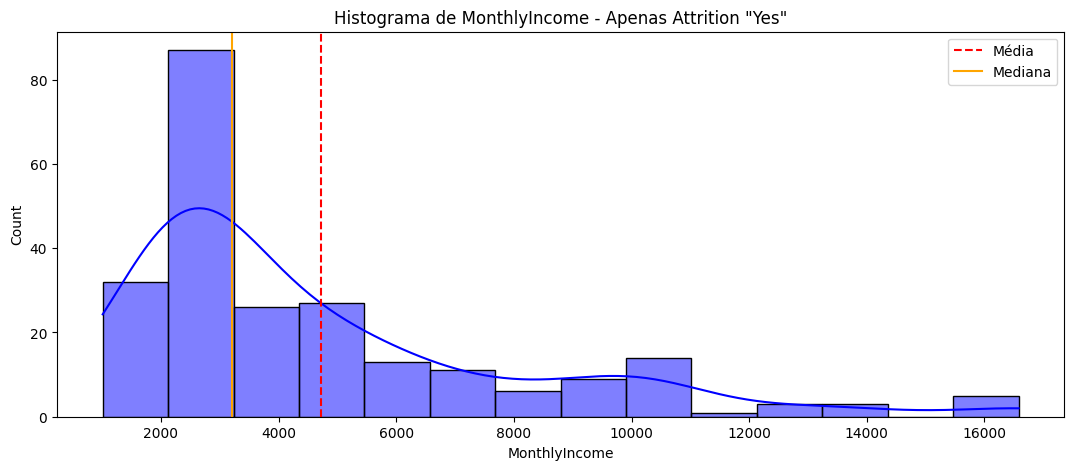

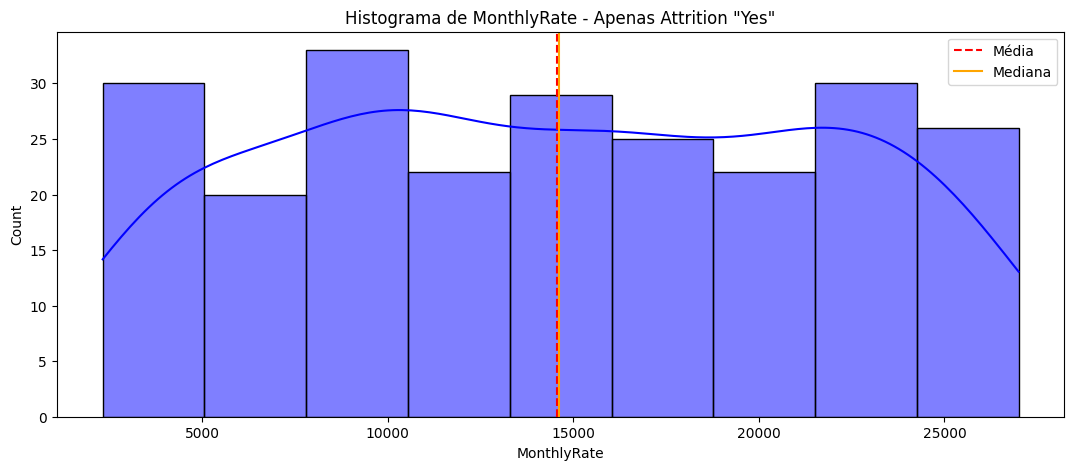

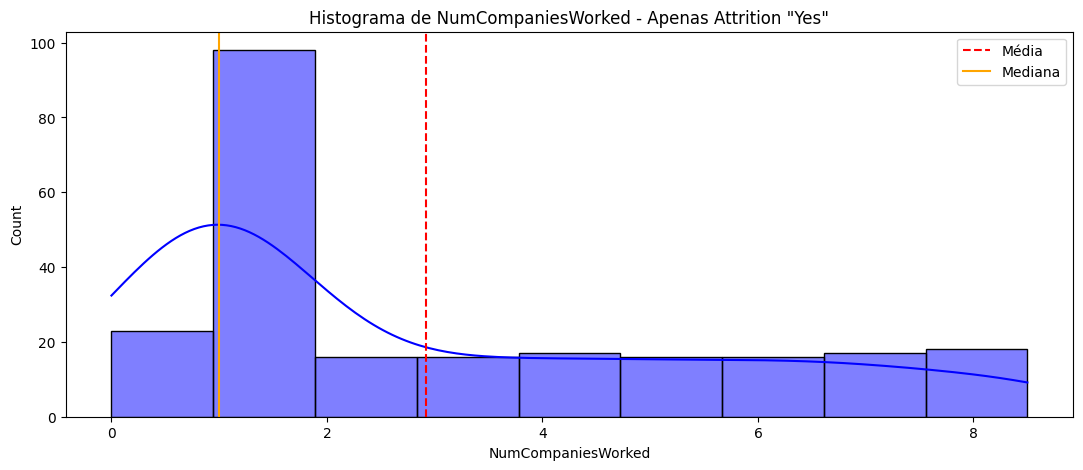

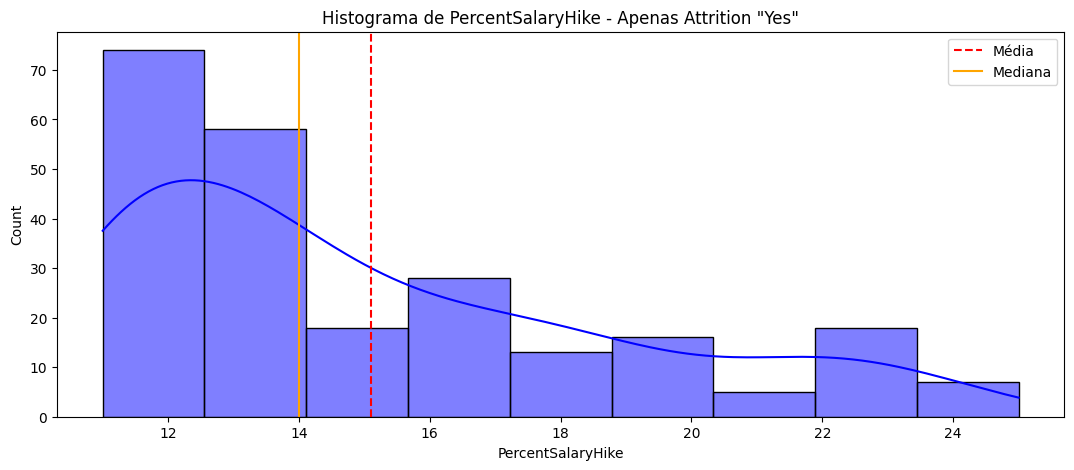

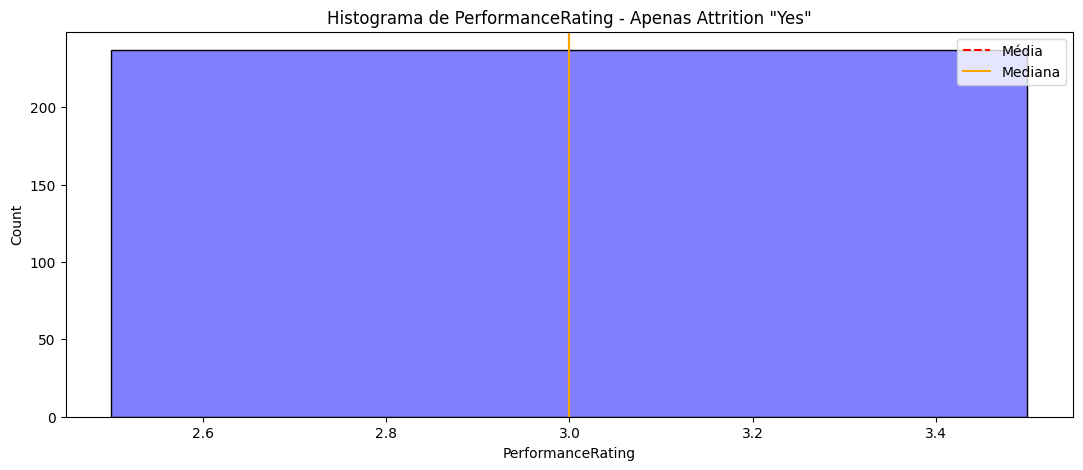

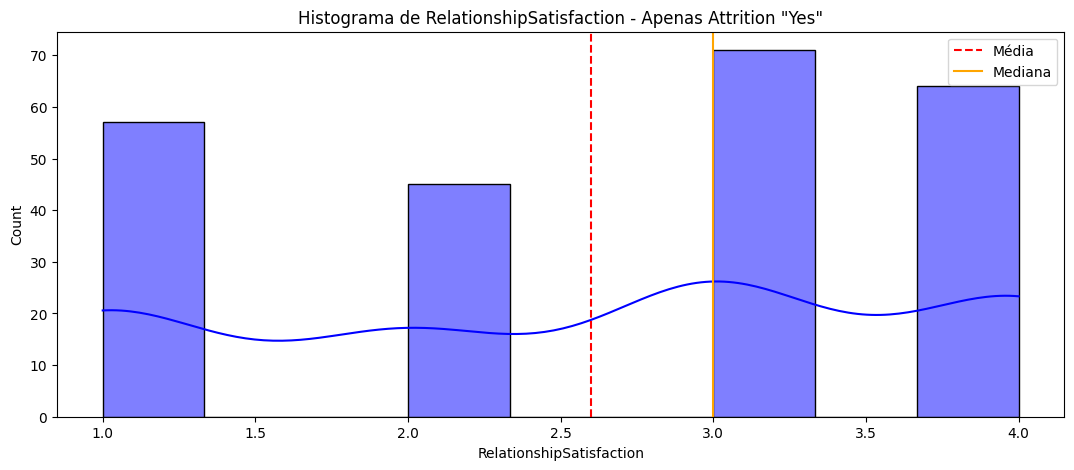

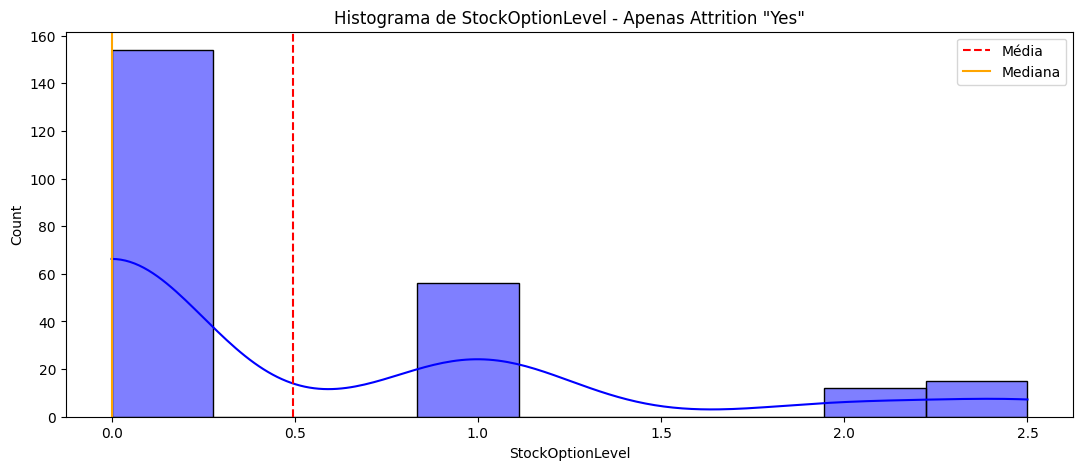

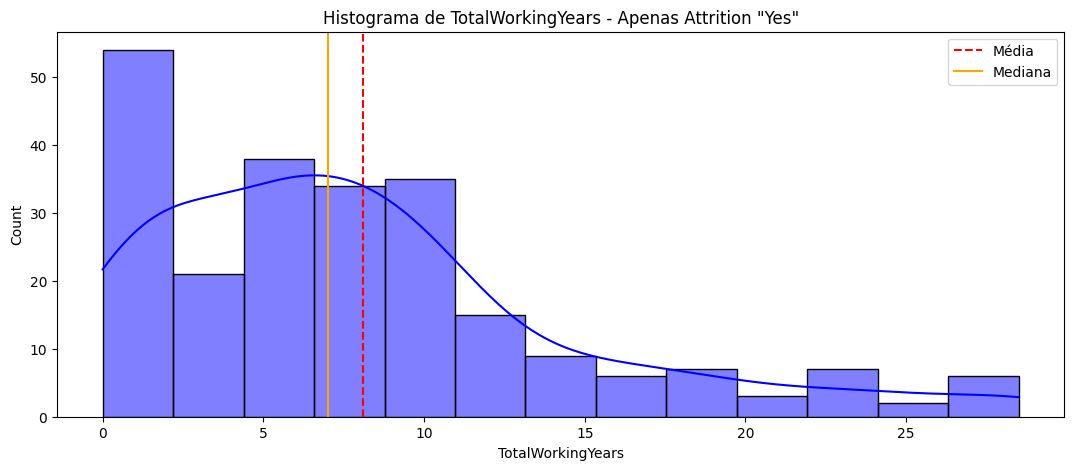

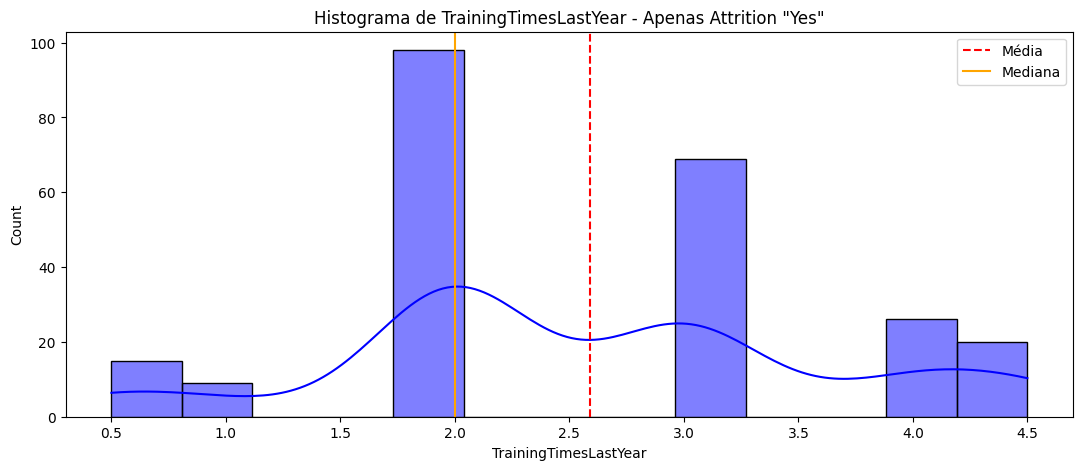

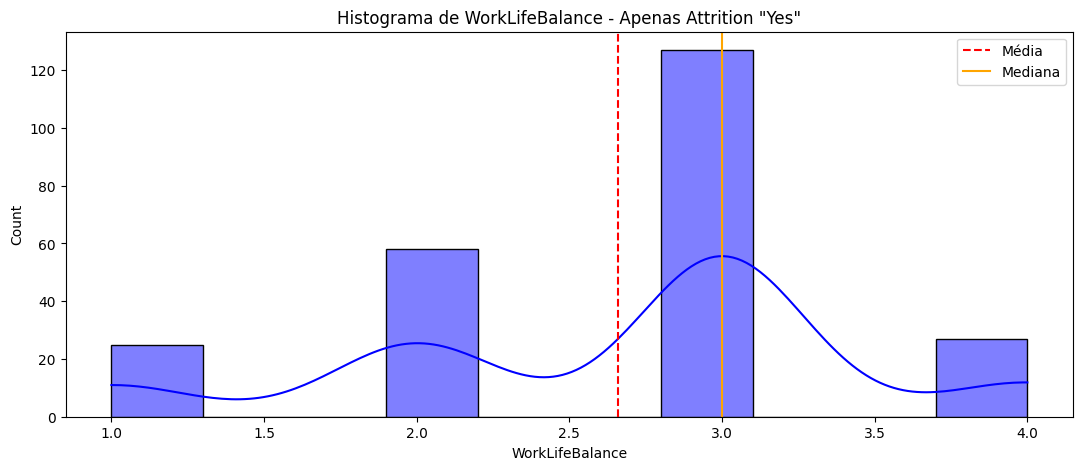

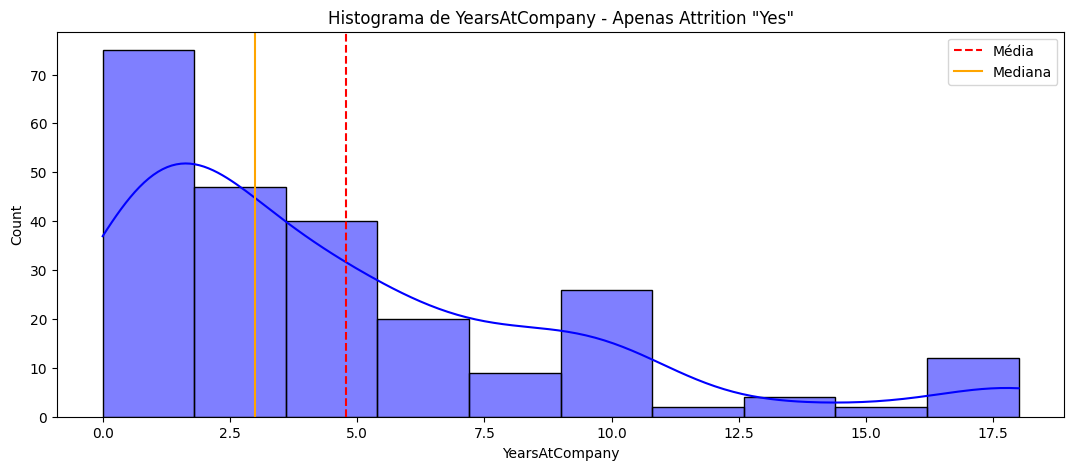

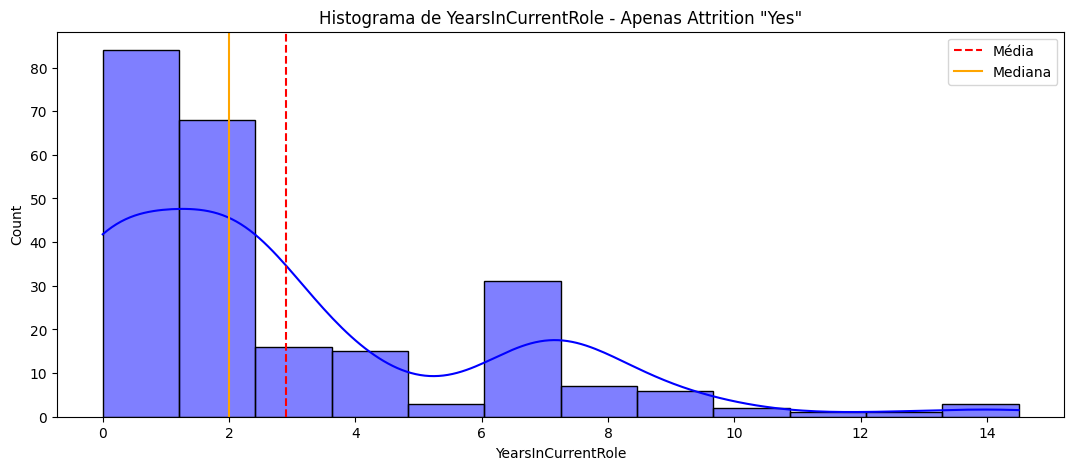

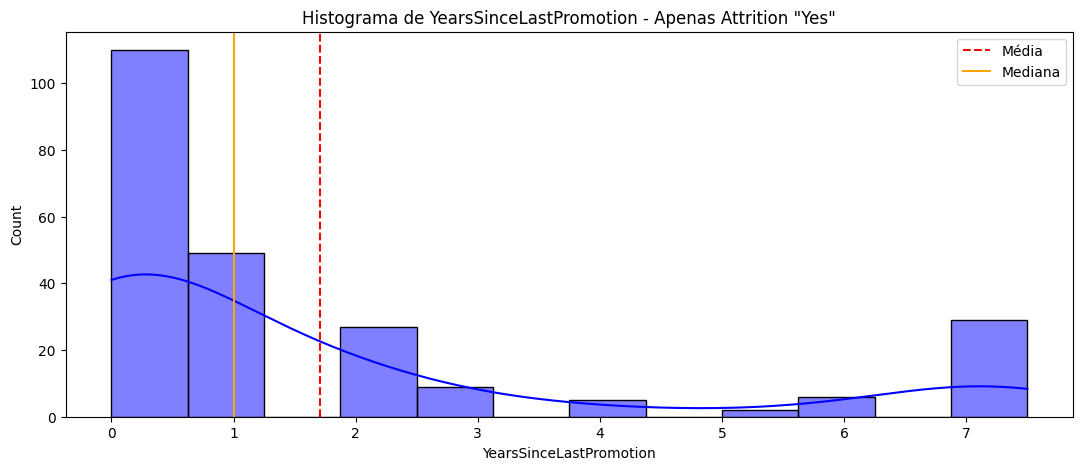

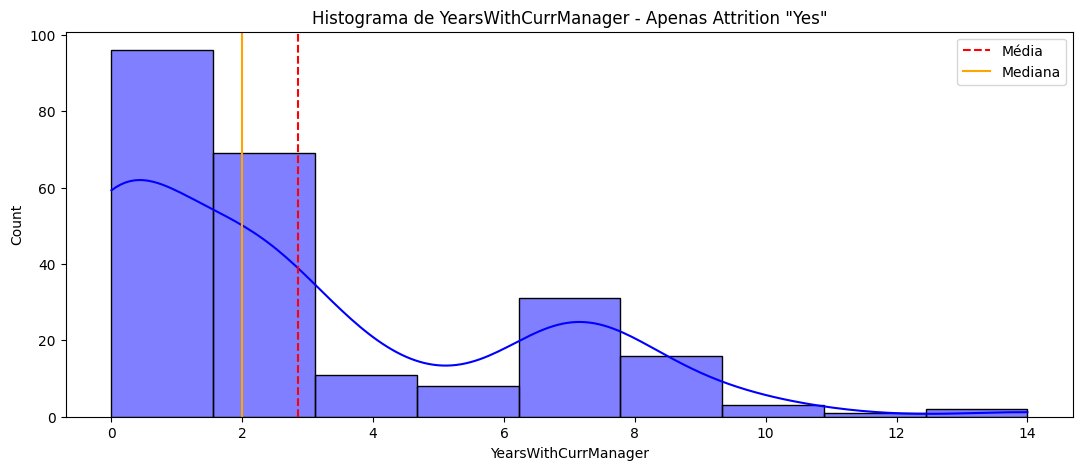

In [ ]:
# Filtro Attrition "yes"
df_yes = df[df['Attrition'].str.strip().str.lower() == 'yes']

# Selecionar colunas numéricas
num_cols_yes = df_yes.select_dtypes(include="number")

# Histograma só para Attrition "Yes"
for col in num_cols_yes.columns:
    plt.figure(figsize=(13,5))
    sns.histplot(num_cols_yes[col], kde=True, color='blue')
    plt.axvline(num_cols_yes[col].mean(), color='red', linestyle='--', label='Média')
    plt.axvline(num_cols_yes[col].median(), color='orange', label='Mediana')
    plt.title(f'Histograma de {col} - Apenas Attrition "Yes"')
    plt.legend()
    plt.show()


**Conclusões:**
- **Age:** média de *~34 anos*, onde a maioria têm *~30 anos*
- **DistanceFromHome:** distância média de 10 Km / Milhas, a maioria mora a ~3 Km / Milhas
- **Education:** Média de ~3 (Bachelor), maioria também está em 3 (Bachelor)
- **EnvironmentSatisfaction:** em média, as pessoas deram a nota aproximada de 2,5 (Medium), maioria colocou nota 1 (Low)
- **JobInvolvement:** média de 2,5 (Medium), onde a maioria deram nota 3 (High)
- **JobLevel:** média e maioria das pessoas são Júnior /  Cargos iniciais
- **JobSatisfaction:** com nota média de 2,5 (Medium) e a maioria deram nota 3 (High)
- **MonthlyIncome:** a média salarial mensal de quem sofre com Attrition é de ~$4750,00 e maioria dessas pessoas recembiam 2500,00 por mês
- **NumCompaniesWorked:** média de ~3, maioria com ~1 empresa trabalhada]
- **PercentSlaryHike:** média de ~15% e maioria com ~10%
- **PerformanceRating:** média e mao
- **RelationshipSatisfaction:** média e maioria deram nota ~3 (High)
- **TotalWorkingYears:** média ~8 anos, maioria entre 0 e 3,5 anos
- **TrainingTimesLastYear:** média e maioria ~3
- **YearsAtCompany:** média de ~5, maioria entre 0 e 1 ano
- **YearsCurrentRole:** média de ~3 anos e maioira localizada entre 0 e 1 ano
- **YearsSinceLastPromotion:** média de 1,5 anos e maioria entre 0 e 1 ano
- **YearsWithCurrentManager:** média de ~3 anos e maioria localizada entre 0 e 1 ano.

# Exportação dos dados

In [ ]:
#df.to_excel('/content/drive/MyDrive/ProjetoDataGirls/BaseDados_ProjetoDataGirls_Limpa.xlsx', index=False)